In [1]:
import pandas as pd

df = pd.read_csv('messy_data.csv')
df

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.50,IF,D,Ideal,5.1,5.15,3.2,61.5,,3000
1,0.70,vvs2,E,premium,5.7,,3.52,62,59,4500
2,NaN,Si2,h,Good,4.3,4.31,,62.3,56,700
3,1.20,if,d,ideal,,6.82,4.2,61.7,58,10000
4,0.90,I1,J,Fair,6,,3.7,61.7,,2400
...,...,...,...,...,...,...,...,...,...,...
195,0.45,si1,F,very good,4.9,4.89,,62.4,59,2300
196,1.25,VVS2,H,Good,6.9,,4.27,,55,10400
197,0.55,i1,I,Premium,5.3,,3.28,62.3,57,150000
198,0.85,Si2,E,fair,6.1,6.13,3.78,,58,6300


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         150 non-null    float64
 1    clarity      200 non-null    object 
 2    color        200 non-null    object 
 3    cut          200 non-null    object 
 4    x dimension  200 non-null    object 
 5    y dimension  200 non-null    object 
 6    z dimension  200 non-null    object 
 7    depth        200 non-null    object 
 8    table        200 non-null    object 
 9    price        200 non-null    object 
dtypes: float64(1), object(9)
memory usage: 15.8+ KB


In [3]:
print('Duplicate rows:', df.duplicated().sum())
df = df.drop_duplicates()
#df = df.dropna()
print('Duplicate rows:', df.duplicated().sum())
df

Duplicate rows: 0
Duplicate rows: 0


,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.50,IF,D,Ideal,5.1,5.15,3.2,61.5,,3000
1,0.70,vvs2,E,premium,5.7,,3.52,62,59,4500
2,NaN,Si2,h,Good,4.3,4.31,,62.3,56,700
3,1.20,if,d,ideal,,6.82,4.2,61.7,58,10000
4,0.90,I1,J,Fair,6,,3.7,61.7,,2400
...,...,...,...,...,...,...,...,...,...,...
195,0.45,si1,F,very good,4.9,4.89,,62.4,59,2300
196,1.25,VVS2,H,Good,6.9,,4.27,,55,10400
197,0.55,i1,I,Premium,5.3,,3.28,62.3,57,150000
198,0.85,Si2,E,fair,6.1,6.13,3.78,,58,6300


In [4]:

cols_list = df.columns.tolist()
#df['x dimension'] = df['x dimension'].astype(float)
cols_list = cols_list[4:]
for i in cols_list:
    df[f'{i}'] = pd.to_numeric(df[f'{i}'], errors='coerce')
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carat         150 non-null    float64
 1    clarity      200 non-null    object 
 2    color        200 non-null    object 
 3    cut          200 non-null    object 
 4    x dimension  197 non-null    float64
 5    y dimension  136 non-null    float64
 6    z dimension  152 non-null    float64
 7    depth        133 non-null    float64
 8    table        167 non-null    float64
 9    price        196 non-null    float64
dtypes: float64(7), object(3)
memory usage: 17.2+ KB


In [5]:
df = df.fillna(df.mean())
df

C:\Users\Paweł\AppData\Local\Temp\ipykernel_23156\983163164.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.500,IF,D,Ideal,5.100000,5.150000,3.200000,61.500000,56.91018,3000.0
1,0.700,vvs2,E,premium,5.700000,5.829706,3.520000,62.000000,59.00000,4500.0
2,0.799,Si2,h,Good,4.300000,4.310000,3.694671,62.300000,56.00000,700.0
3,1.200,if,d,ideal,5.885787,6.820000,4.200000,61.700000,58.00000,10000.0
4,0.900,I1,J,Fair,6.000000,5.829706,3.700000,61.700000,56.91018,2400.0
...,...,...,...,...,...,...,...,...,...,...
195,0.450,si1,F,very good,4.900000,4.890000,3.694671,62.400000,59.00000,2300.0
196,1.250,VVS2,H,Good,6.900000,5.829706,4.270000,62.316541,55.00000,10400.0
197,0.550,i1,I,Premium,5.300000,5.829706,3.280000,62.300000,57.00000,150000.0
198,0.850,Si2,E,fair,6.100000,6.130000,3.780000,62.316541,58.00000,6300.0


In [6]:

cols_list = df.columns.tolist()
for i in cols_list:
    print(df.value_counts(df[f'{i}']))

carat
0.799    50
0.500    13
0.550    12
0.400    10
0.450     9
0.700     8
0.650     8
0.750     8
1.050     8
0.600     7
1.300     7
0.900     7
0.850     7
0.950     6
1.200     6
1.150     5
1.400     5
1.250     4
0.800     4
1.100     4
0.350     4
1.000     2
1.350     2
1.500     1
0.200     1
0.300     1
1.600     1
dtype: int64
 clarity
 i1      26
 VVS1    23
 si2     23
 IF      20
 VVS2    19
 si1     18
 vvs2    18
 Si2     16
 Si1     12
 vvs1    11
 I1       5
 SI2      5
 if       3
 Vvs1     1
dtype: int64
 color
 G            36
 I            33
 H            30
 F            24
 D            13
 E            13
 e            12
 d             9
 colorless     6
 f             6
 j             6
 g             4
 h             4
 Colorless     2
 J             2
dtype: int64
 cut
 Premium      34
 Good         30
 fair         24
 Ideal        23
 good         21
 very good    19
 Fair         12
 Very good    10
 Very Good     9
 ideal         9
 premium       7


In [7]:
cols_list = df.columns.tolist()
for i in cols_list:
    if df[f'{i}'].dtype == object:
        df[f'{i}'] = df[f'{i}'].str.upper()  
    print(df.value_counts(df[f'{i}']))

carat
0.799    50
0.500    13
0.550    12
0.400    10
0.450     9
0.700     8
0.650     8
0.750     8
1.050     8
0.600     7
1.300     7
0.900     7
0.850     7
0.950     6
1.200     6
1.150     5
1.400     5
1.250     4
0.800     4
1.100     4
0.350     4
1.000     2
1.350     2
1.500     1
0.200     1
0.300     1
1.600     1
dtype: int64
 clarity
 SI2     44
 VVS2    37
 VVS1    35
 I1      31
 SI1     30
 IF      23
dtype: int64
 color
 G            40
 H            34
 I            33
 F            30
 E            25
 D            22
 COLORLESS     8
 J             8
dtype: int64
 cut
 GOOD         51
 PREMIUM      41
 VERY GOOD    40
 FAIR         36
 IDEAL        32
dtype: int64
 x dimension
5.900000    11
5.700000    10
5.600000    10
6.900000    10
6.800000     9
6.600000     9
6.300000     9
6.400000     9
4.800000     9
5.300000     8
5.500000     8
5.200000     7
5.400000     7
6.500000     7
6.700000     7
6.000000     7
6.100000     7
5.100000     6
5.800000     6
4.9000

In [8]:
df

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
0,0.500,IF,D,IDEAL,5.100000,5.150000,3.200000,61.500000,56.91018,3000.0
1,0.700,VVS2,E,PREMIUM,5.700000,5.829706,3.520000,62.000000,59.00000,4500.0
2,0.799,SI2,H,GOOD,4.300000,4.310000,3.694671,62.300000,56.00000,700.0
3,1.200,IF,D,IDEAL,5.885787,6.820000,4.200000,61.700000,58.00000,10000.0
4,0.900,I1,J,FAIR,6.000000,5.829706,3.700000,61.700000,56.91018,2400.0
...,...,...,...,...,...,...,...,...,...,...
195,0.450,SI1,F,VERY GOOD,4.900000,4.890000,3.694671,62.400000,59.00000,2300.0
196,1.250,VVS2,H,GOOD,6.900000,5.829706,4.270000,62.316541,55.00000,10400.0
197,0.550,I1,I,PREMIUM,5.300000,5.829706,3.280000,62.300000,57.00000,150000.0
198,0.850,SI2,E,FAIR,6.100000,6.130000,3.780000,62.316541,58.00000,6300.0


In [9]:
df.describe()

,carat,x dimension,y dimension,z dimension,depth,table,price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.799000,5.885787,5.829706,3.694671,62.316541,56.910180,11410.714286
std,0.278477,0.764344,0.632067,0.402818,0.265841,1.298729,39667.884273
min,0.200000,3.900000,3.890000,2.410000,61.200000,54.000000,500.000000
25%,0.587500,5.300000,5.580000,3.477500,62.200000,56.000000,2600.000000
50%,0.799000,5.900000,5.829706,3.694671,62.316541,57.000000,4450.000000
75%,0.950000,6.500000,6.165000,3.970000,62.400000,58.000000,8025.000000
max,1.600000,7.300000,7.280000,4.500000,63.000000,60.000000,350000.000000


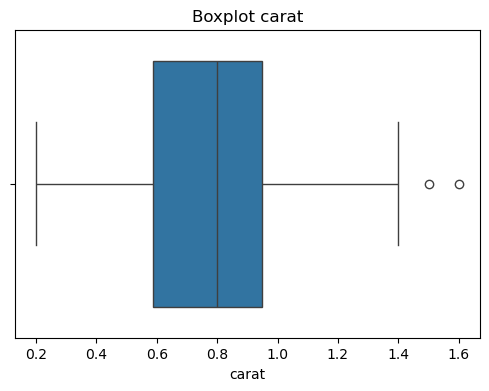

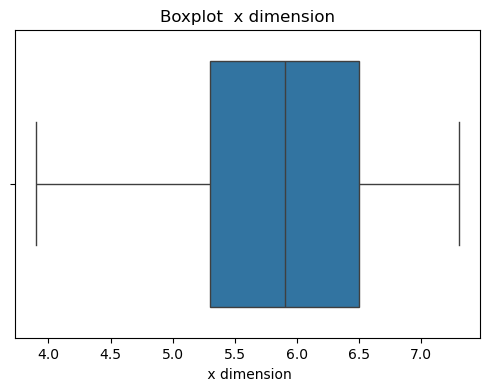

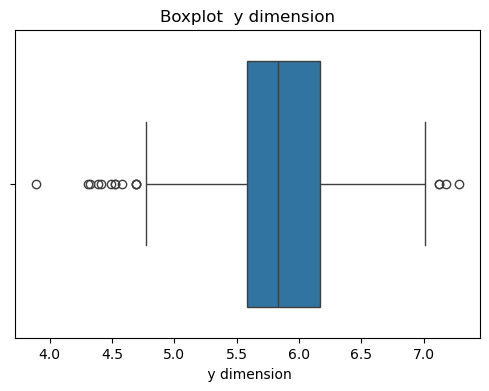

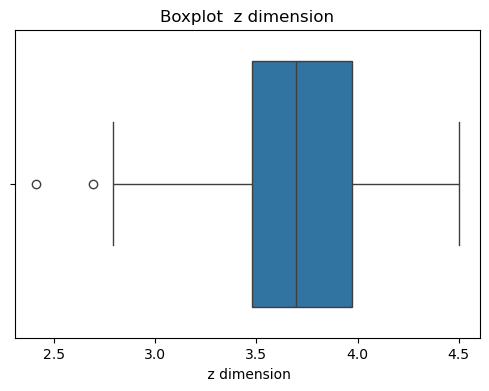

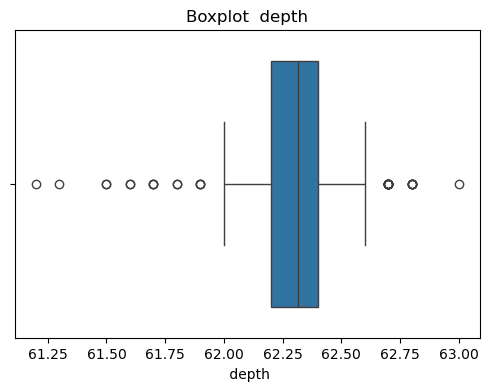

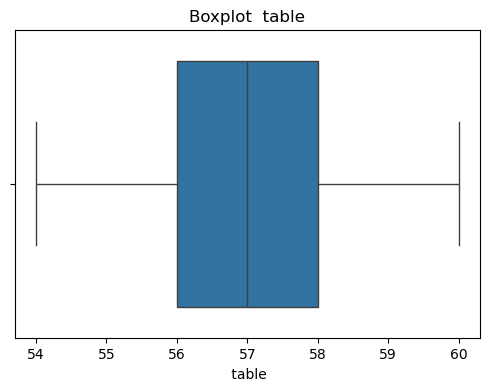

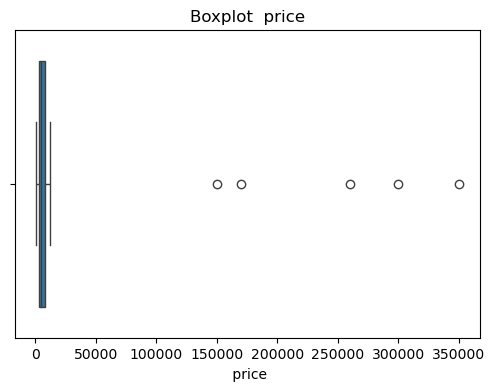

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

cols_list = df.columns.tolist()
for i in cols_list:
    if df[f'{i}'].dtype != object:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[f'{i}'])  
        plt.title(f'Boxplot {i}')
        plt.show()

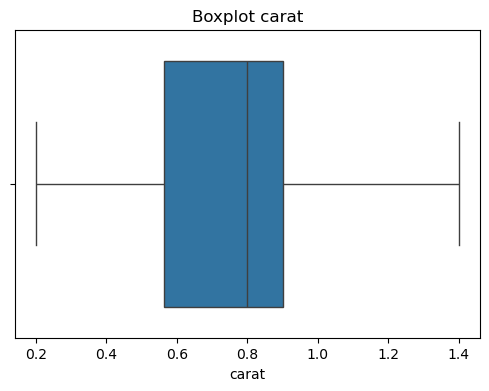

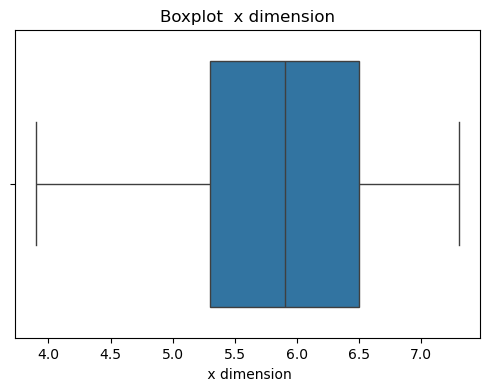

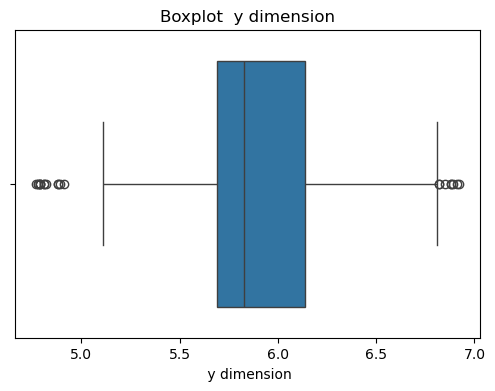

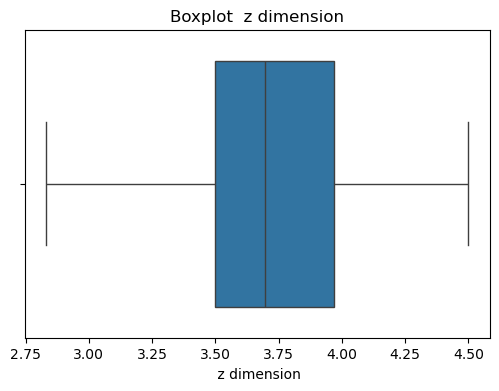

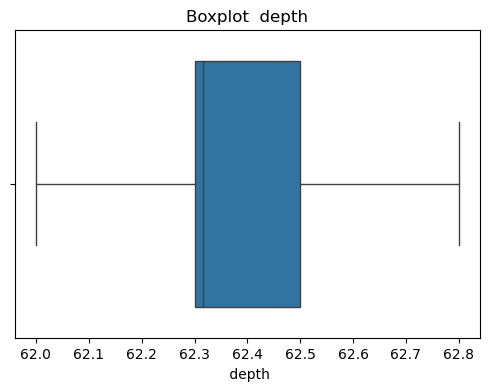

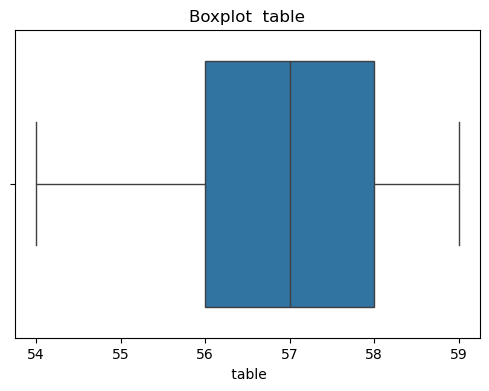

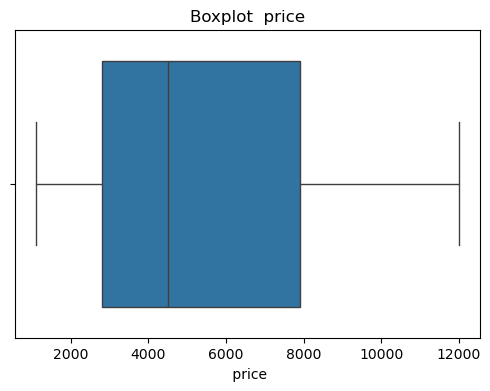

In [11]:
for i in cols_list:
    if df[f'{i}'].dtype != object:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]

        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[f'{i}'])  
        plt.title(f'Boxplot {i}')
        plt.show()

In [12]:
df.describe()

,carat,x dimension,y dimension,z dimension,depth,table,price
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,0.800364,5.951515,5.901478,3.717621,62.372076,56.895482,5455.757576
std,0.251338,0.671784,0.507154,0.366045,0.187234,1.305241,2980.287912
min,0.350000,4.600000,4.770000,2.830000,62.000000,54.000000,1100.000000
25%,0.600000,5.500000,5.690000,3.520000,62.300000,56.000000,2800.000000
50%,0.799000,5.900000,5.829706,3.694671,62.316541,57.000000,4500.000000
75%,0.950000,6.500000,6.210000,3.970000,62.500000,58.000000,7900.000000
max,1.400000,7.200000,6.920000,4.460000,62.800000,59.000000,12000.000000


In [13]:
df

,carat,clarity,color,cut,x dimension,y dimension,z dimension,depth,table,price
1,0.700,VVS2,E,PREMIUM,5.7,5.829706,3.520000,62.000000,59.00000,4500.0
5,0.799,SI1,G,VERY GOOD,5.9,5.920000,3.630000,62.316541,57.00000,4200.0
7,0.400,VVS1,F,GOOD,4.8,4.790000,2.950000,62.316541,56.91018,1500.0
9,1.000,VVS1,F,IDEAL,6.4,5.829706,4.000000,62.316541,58.00000,7500.0
12,0.799,SI2,J,FAIR,5.7,5.710000,3.540000,62.316541,54.00000,2000.0
...,...,...,...,...,...,...,...,...,...,...
194,0.950,SI1,G,IDEAL,6.4,6.420000,3.960000,62.316541,56.00000,7100.0
195,0.450,SI1,F,VERY GOOD,4.9,4.890000,3.694671,62.400000,59.00000,2300.0
196,1.250,VVS2,H,GOOD,6.9,5.829706,4.270000,62.316541,55.00000,10400.0
198,0.850,SI2,E,FAIR,6.1,6.130000,3.780000,62.316541,58.00000,6300.0


In [14]:
df.to_csv('df_to_dash.csv', index=False) 

In [15]:
import plotly.express as px

In [16]:
for i in cols_list:
    fig = px.histogram(df, x=i, marginal='box', nbins=30, title=f'Histogram - {i}')
    fig.show()

In [17]:
for i in cols_list:
    fig = px.box(df, x=i, y=' price')
    fig.update_layout(title=f'Boxplot - {i} i price', xaxis_title=i, yaxis_title='price')
    fig.show()

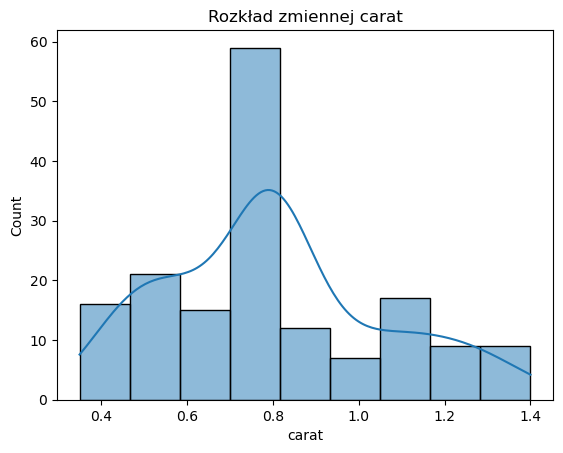

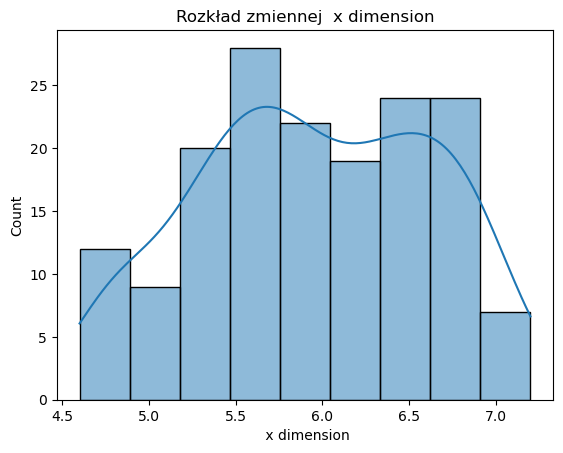

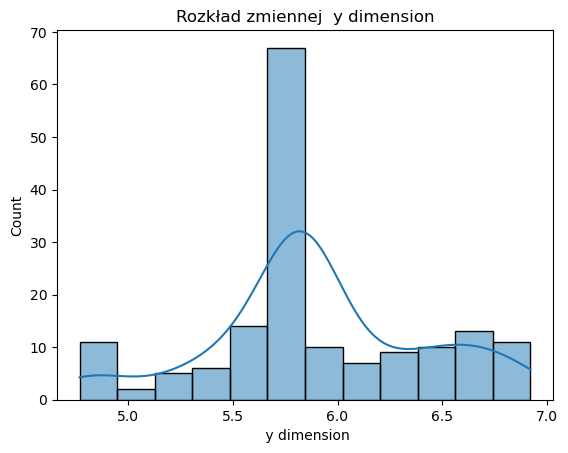

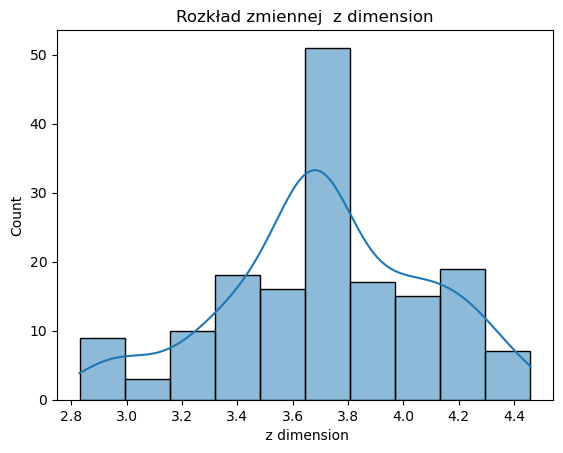

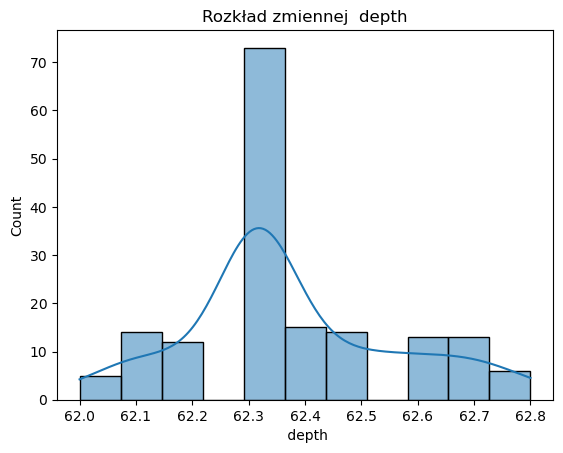

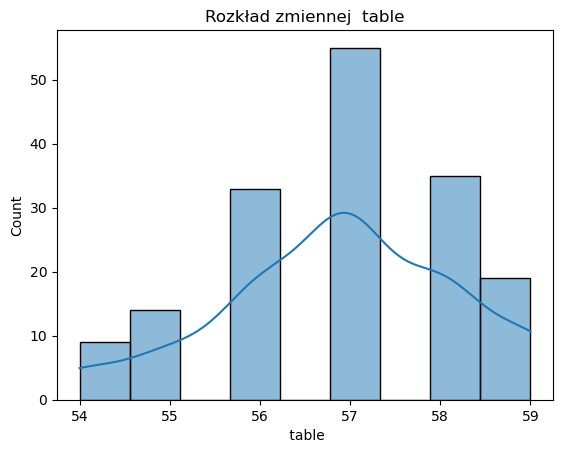

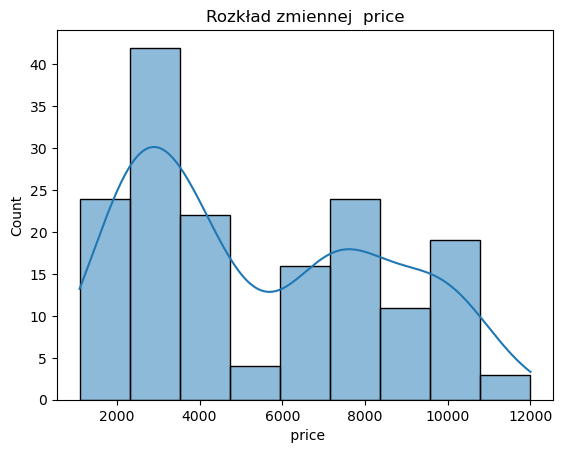

In [18]:
for i in cols_list:
    if df[f'{i}'].dtype == 'float64' or df[f'{i}'].dtype == 'int':
        sns.histplot(df[f'{i}'], kde=True)
        plt.title(f'Rozkład zmiennej {i}')
        plt.show()

In [19]:
for i in cols_list:
    fig = px.scatter(df, x=i, title=f'Scatter Plot - {i}')
    fig.show()

In [20]:
one_hot_encoded = pd.get_dummies(df, dtype=int)
one_hot_encoded

,carat,x dimension,y dimension,z dimension,depth,table,price,clarity_ I1,clarity_ IF,clarity_ SI1,...,color_ F,color_ G,color_ H,color_ I,color_ J,cut_ FAIR,cut_ GOOD,cut_ IDEAL,cut_ PREMIUM,cut_ VERY GOOD
1,0.700,5.7,5.829706,3.520000,62.000000,59.00000,4500.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0.799,5.9,5.920000,3.630000,62.316541,57.00000,4200.0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
7,0.400,4.8,4.790000,2.950000,62.316541,56.91018,1500.0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
9,1.000,6.4,5.829706,4.000000,62.316541,58.00000,7500.0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
12,0.799,5.7,5.710000,3.540000,62.316541,54.00000,2000.0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.950,6.4,6.420000,3.960000,62.316541,56.00000,7100.0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
195,0.450,4.9,4.890000,3.694671,62.400000,59.00000,2300.0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
196,1.250,6.9,5.829706,4.270000,62.316541,55.00000,10400.0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
198,0.850,6.1,6.130000,3.780000,62.316541,58.00000,6300.0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(one_hot_encoded)

one_hot_encoded = pd.DataFrame(scaler.transform(one_hot_encoded),columns=one_hot_encoded.columns.tolist())
one_hot_encoded

,carat,x dimension,y dimension,z dimension,depth,table,price,clarity_ I1,clarity_ IF,clarity_ SI1,...,color_ F,color_ G,color_ H,color_ I,color_ J,cut_ FAIR,cut_ GOOD,cut_ IDEAL,cut_ PREMIUM,cut_ VERY GOOD
0,-0.400533,-0.375539,-0.141950,-0.541526,-1.993275,1.617268,-0.321669,-0.381881,-0.304492,-0.412568,...,-0.442326,-0.480982,-0.490511,-0.422577,-0.176777,-0.471405,-0.593683,-0.381881,1.927248,-0.528271
1,-0.005442,-0.076918,0.036633,-0.240102,-0.297507,0.080320,-0.422637,-0.381881,-0.304492,2.423840,...,-0.442326,2.079082,-0.490511,-0.422577,-0.176777,-0.471405,-0.593683,-0.381881,-0.518875,1.892969
2,-1.597778,-1.719334,-2.198268,-2.103454,-0.297507,0.011295,-1.331348,-0.381881,-0.304492,-0.412568,...,2.260777,-0.480982,-0.490511,-0.422577,-0.176777,-0.471405,1.684402,-0.381881,-0.518875,-0.528271
3,0.796712,0.669635,-0.141950,0.773781,-0.297507,0.848794,0.688009,-0.381881,-0.304492,-0.412568,...,2.260777,-0.480982,-0.490511,-0.422577,-0.176777,-0.471405,-0.593683,2.618615,-0.518875,-0.528271
4,-0.005442,-0.375539,-0.378702,-0.486722,-0.297507,-2.225103,-1.163068,-0.381881,-0.304492,-0.412568,...,-0.442326,-0.480982,-0.490511,-0.422577,5.656854,2.121320,-0.593683,-0.381881,-0.518875,-0.528271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0.597171,0.669635,1.025527,0.664172,-0.297507,-0.688155,0.553385,-0.381881,-0.304492,2.423840,...,-0.442326,2.079082,-0.490511,-0.422577,-0.176777,-0.471405,-0.593683,2.618615,-0.518875,-0.528271
161,-1.398237,-1.570023,-2.000489,-0.062889,0.149596,1.617268,-1.062100,-0.381881,-0.304492,2.423840,...,2.260777,-0.480982,-0.490511,-0.422577,-0.176777,-0.471405,-0.593683,-0.381881,-0.518875,1.892969
162,1.794416,1.416188,-0.141950,1.513641,-0.297507,-1.456629,1.664032,-0.381881,-0.304492,-0.412568,...,-0.442326,-0.480982,2.038688,-0.422577,-0.176777,-0.471405,1.684402,-0.381881,-0.518875,-0.528271
163,0.198090,0.221704,0.451969,0.170932,-0.297507,0.848794,0.284138,-0.381881,-0.304492,-0.412568,...,-0.442326,-0.480982,-0.490511,-0.422577,-0.176777,2.121320,-0.593683,-0.381881,-0.518875,-0.528271


In [22]:
import plotly.figure_factory as ff

correlation_matrix = one_hot_encoded.corr()

fig = ff.create_annotated_heatmap(
    z=correlation_matrix.values,
    x=list(correlation_matrix.columns),
    y=list(correlation_matrix.index),
    colorscale='Viridis',
    annotation_text=correlation_matrix.round(2).values,
    showscale=True,
)

fig.update_layout(
    width=1100,
    height=1100,
)

fig.show()

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     511.1
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           4.07e-52
Time:                        10:56:42   Log-Likelihood:                -117.01
No. Observations:                 165   AIC:                             238.0
Df Residuals:                     163   BIC:                             244.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.327e-17      0.039  -2.16e-15      1.0

C:\Users\Paweł\AppData\Local\Temp\ipykernel_23156\3979649287.py:19: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6925
Date:                Sun, 04 Feb 2024   Prob (F-statistic):              0.407
Time:                        10:56:47   Log-Likelihood:                -233.78
No. Observations:                 165   AIC:                             471.6
Df Residuals:                     163   BIC:                             477.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.327e-17      0.078  -1.07e-15      1.0

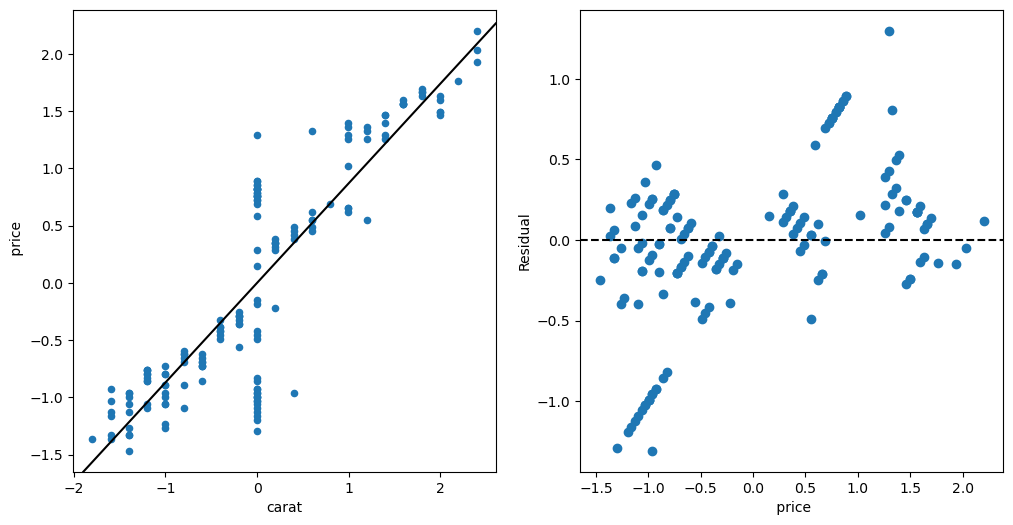

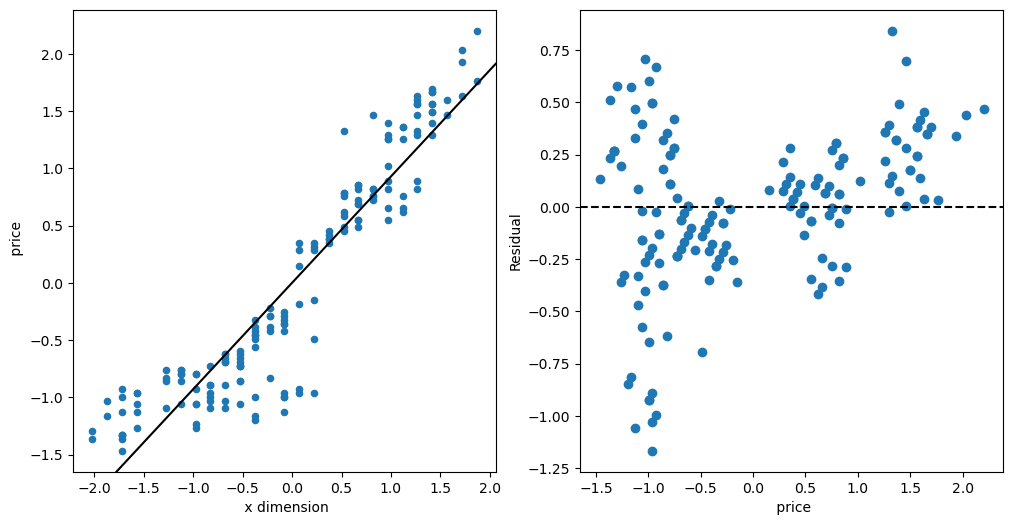

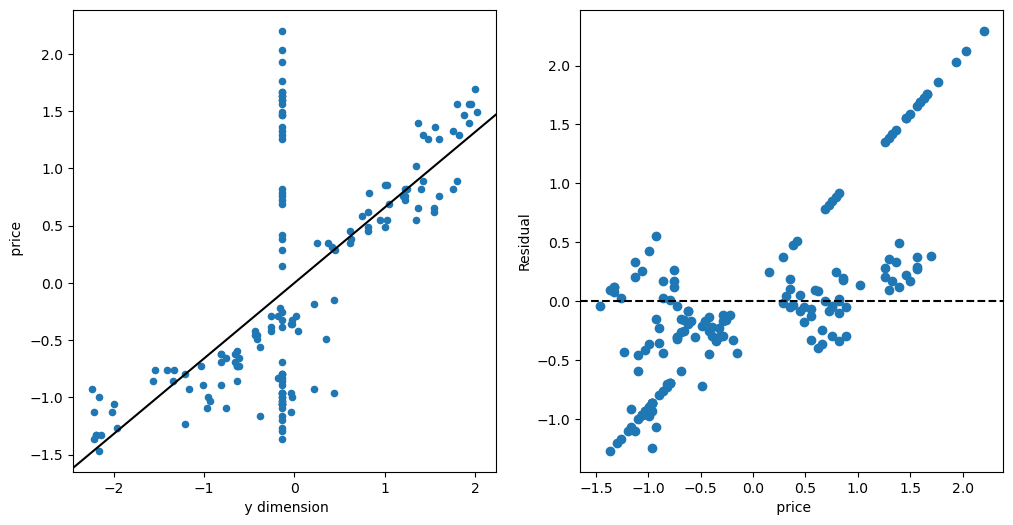

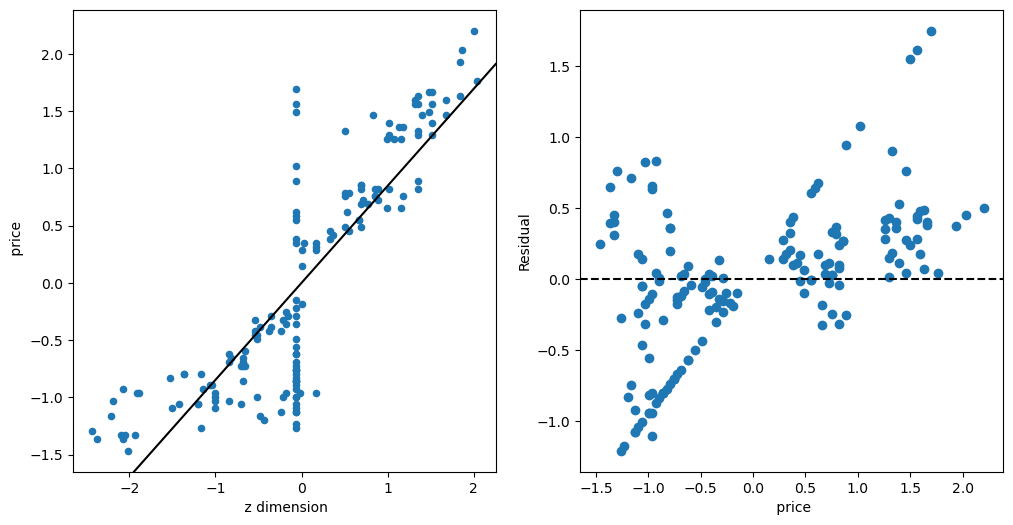

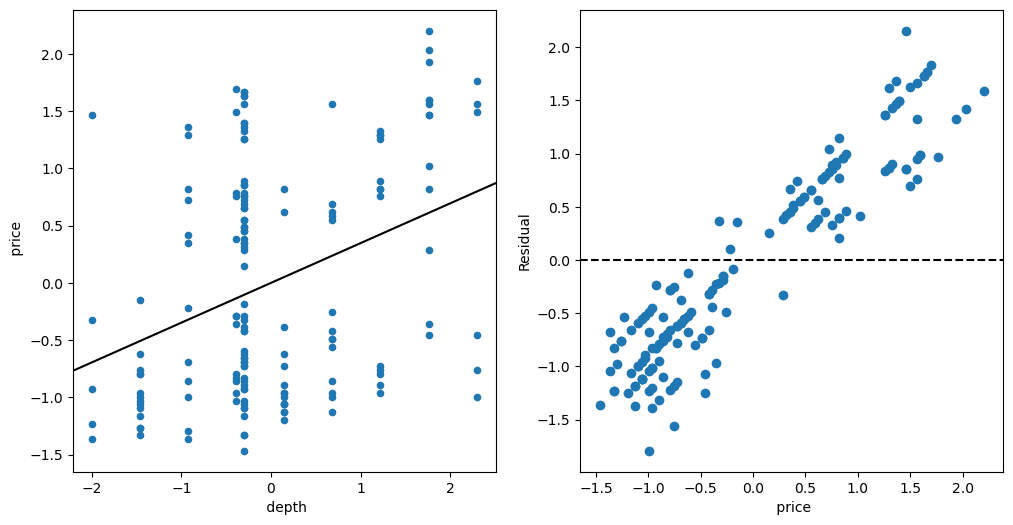

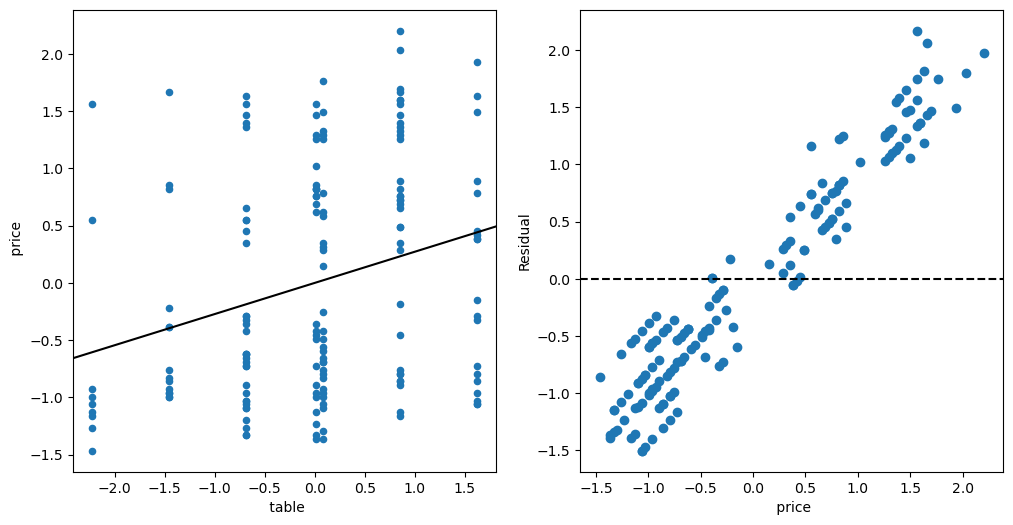

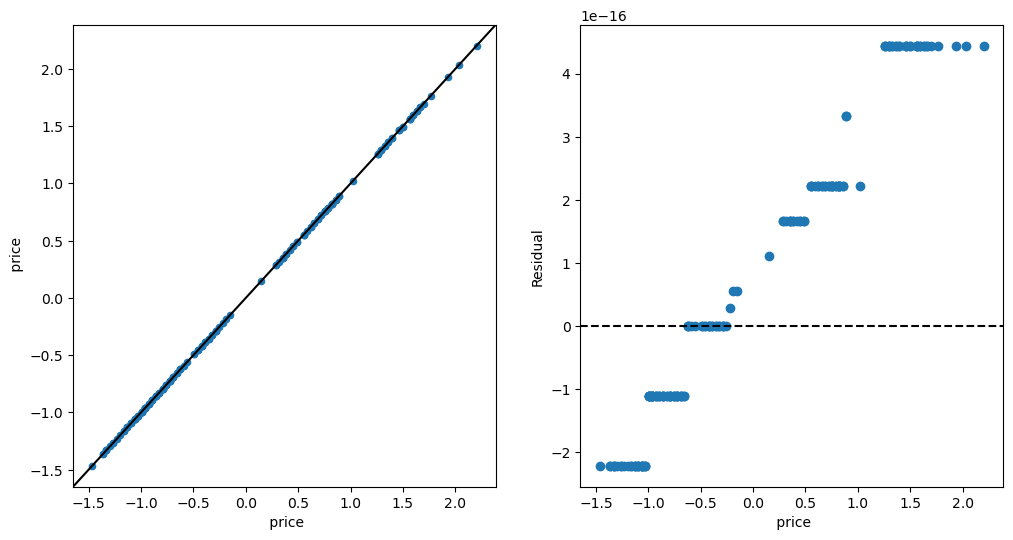

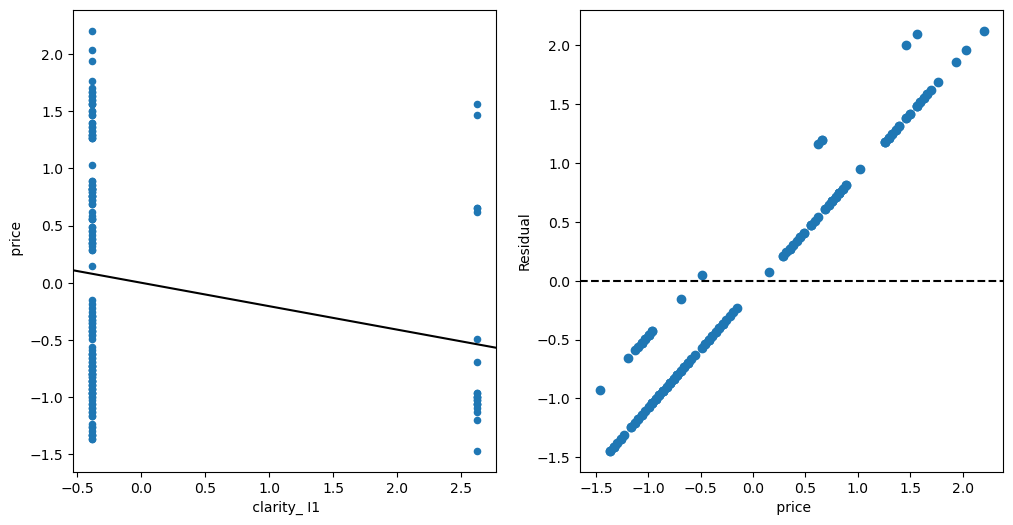

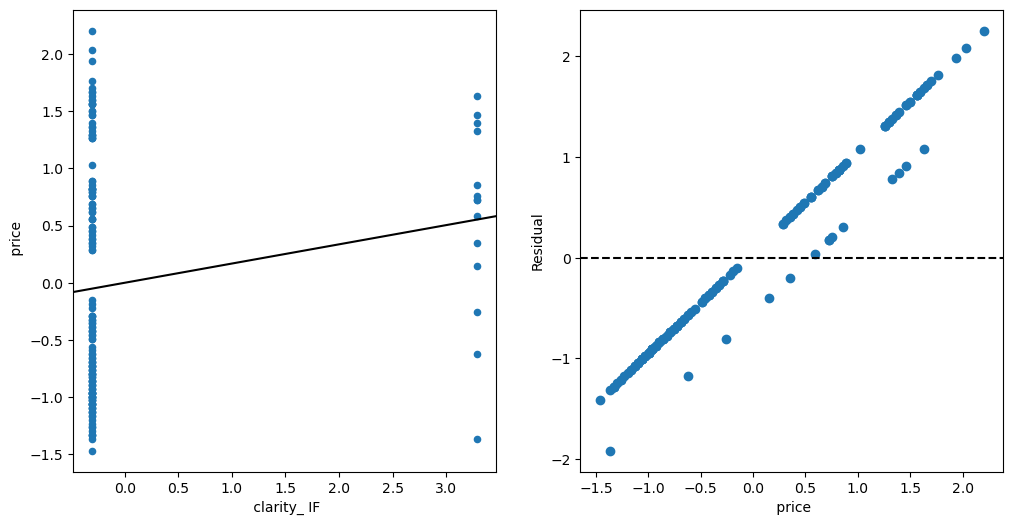

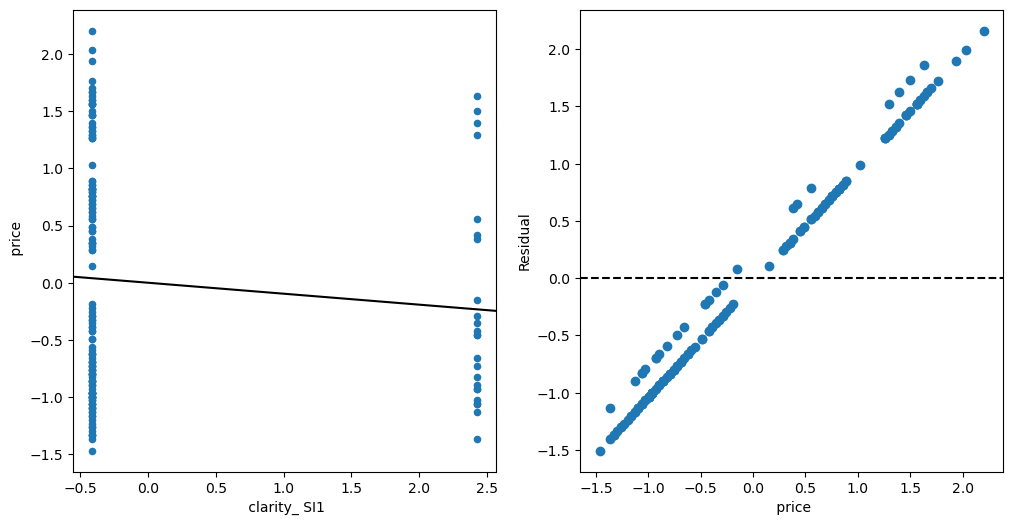

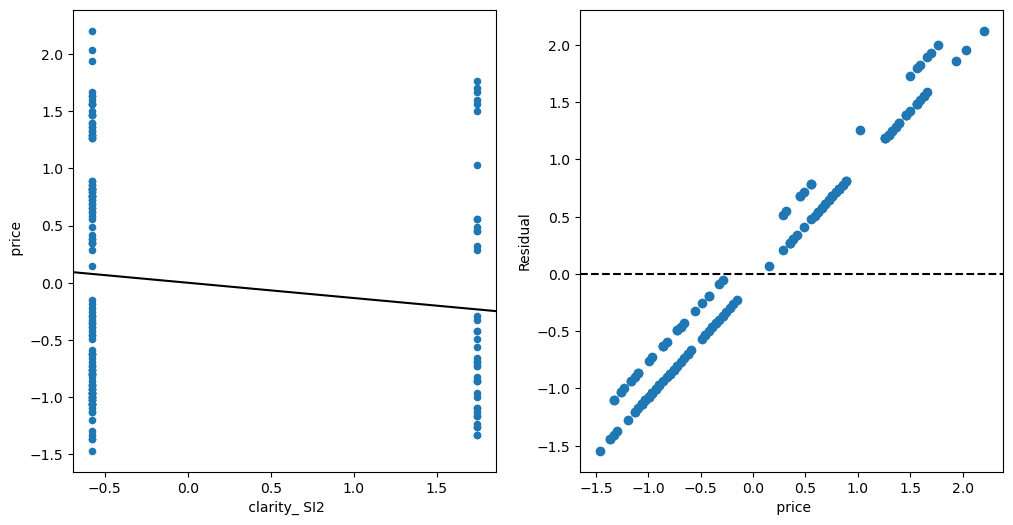

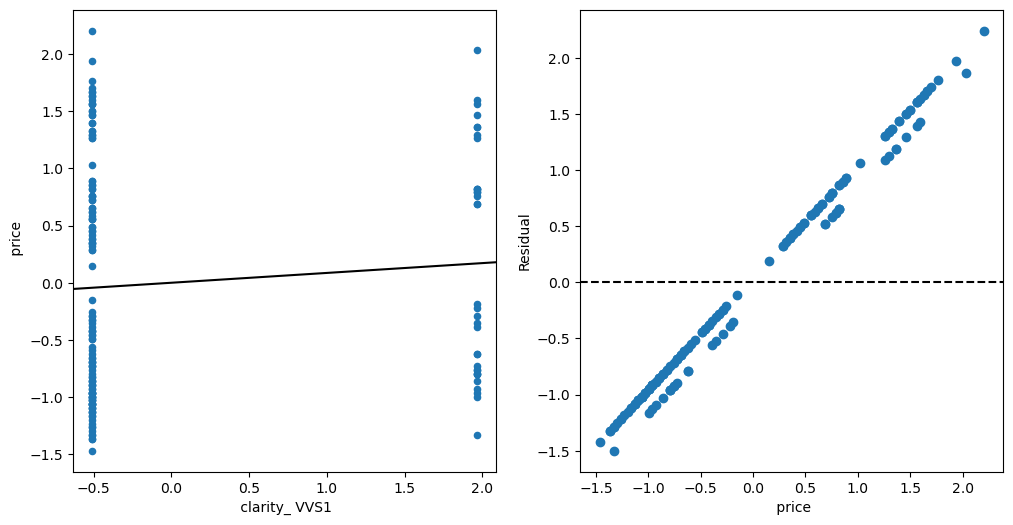

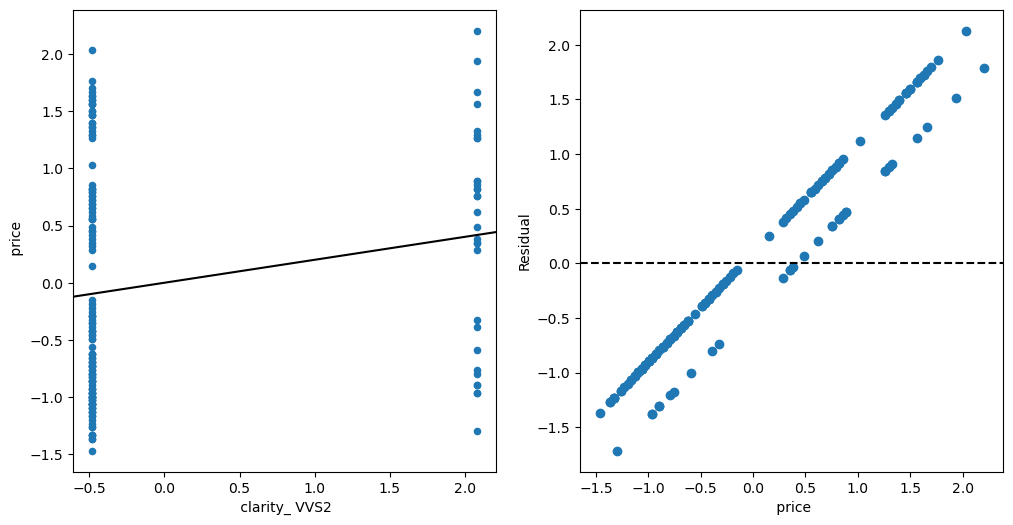

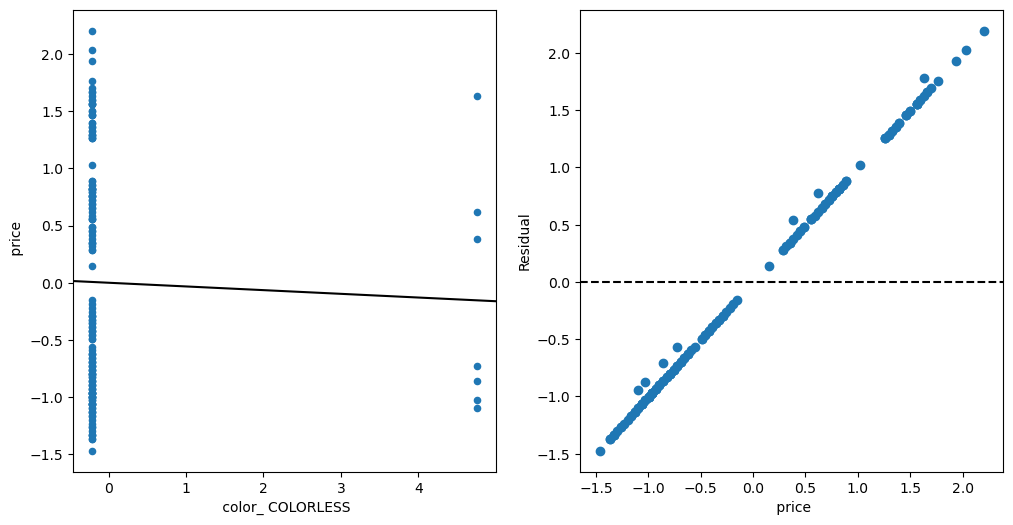

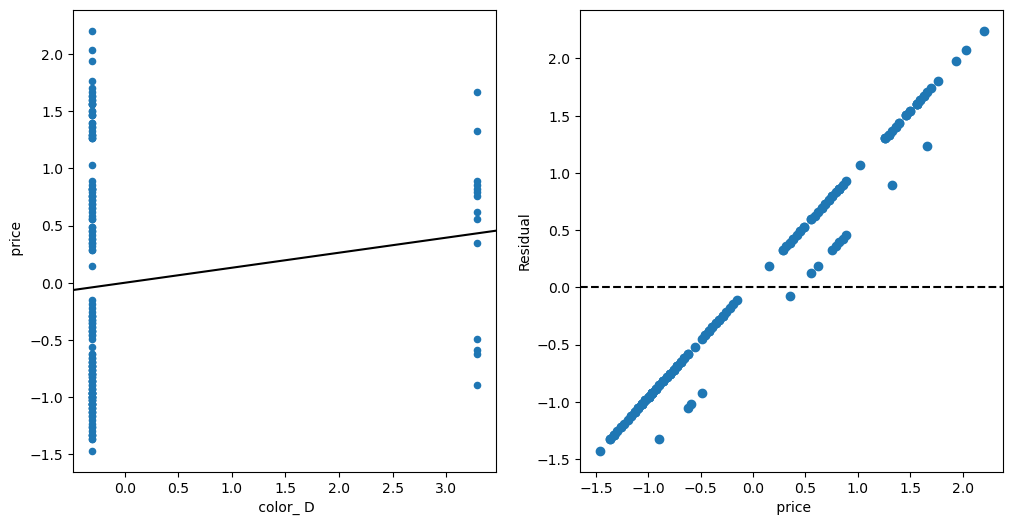

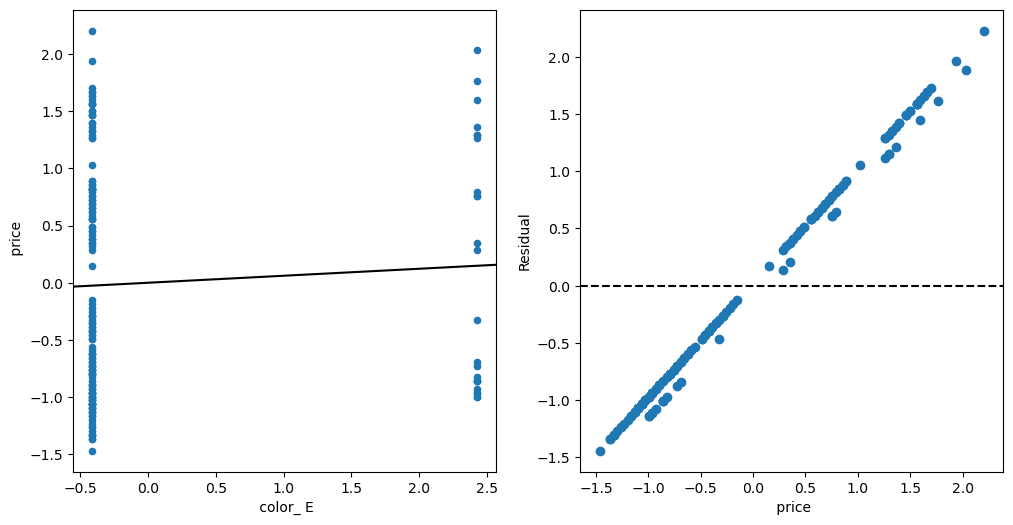

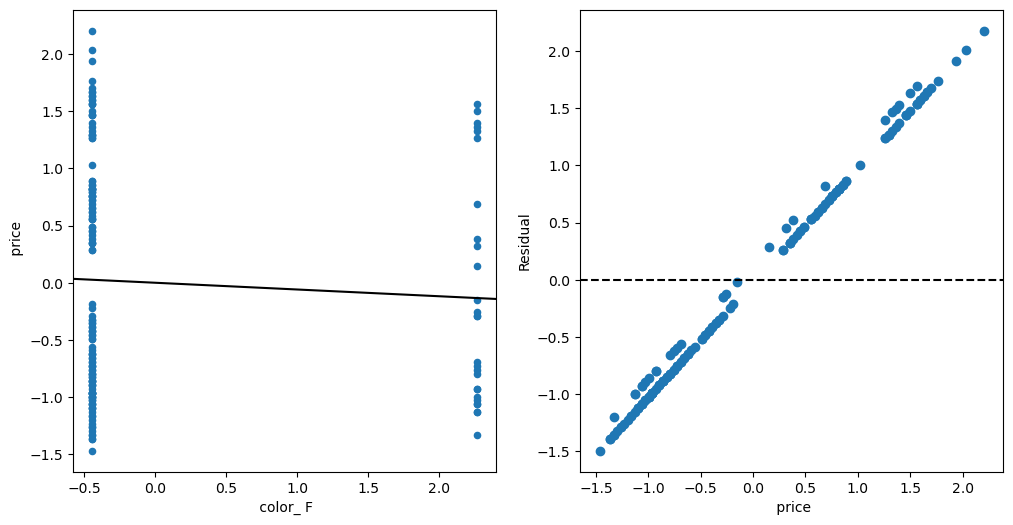

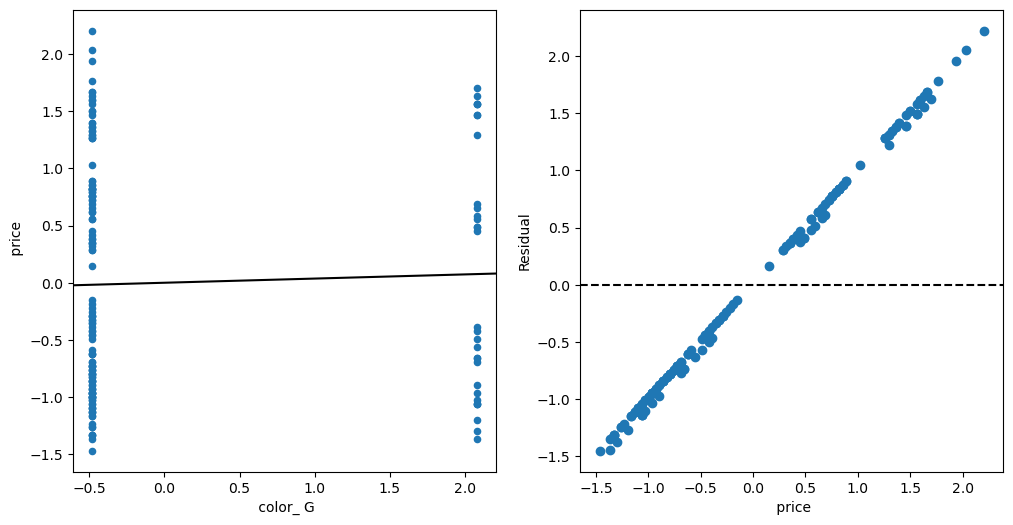

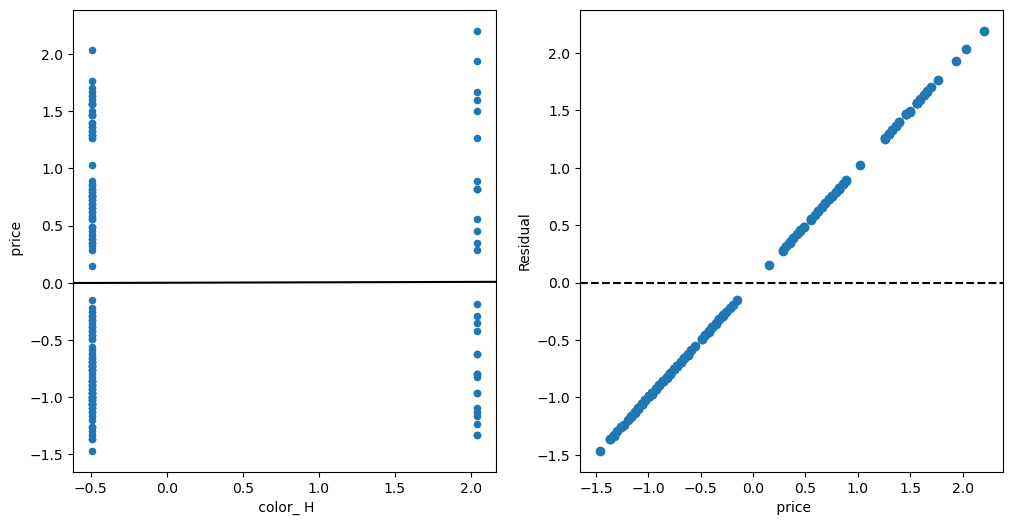

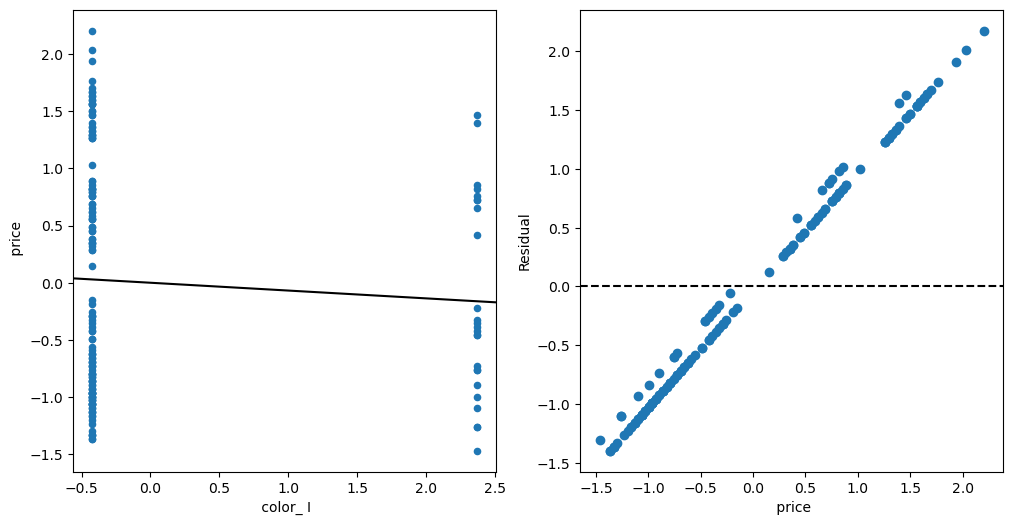

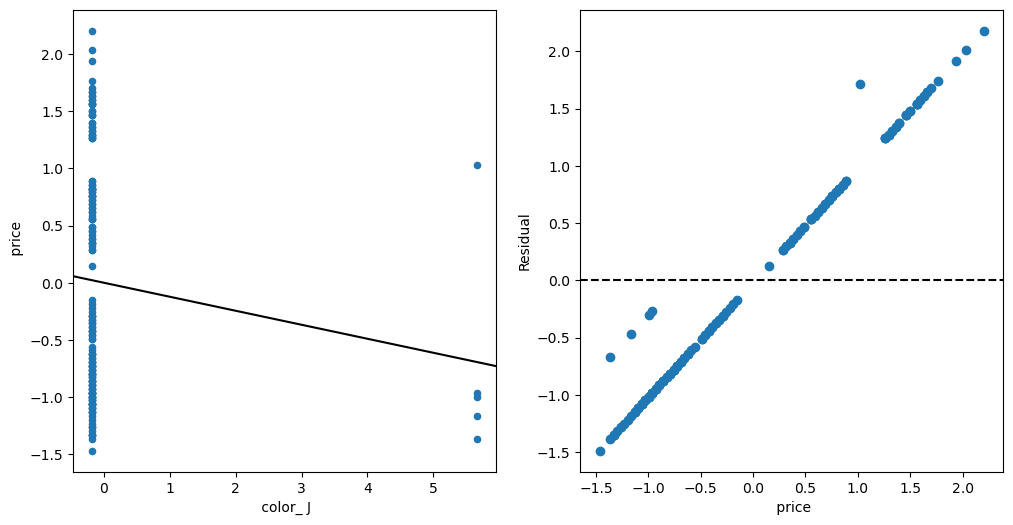

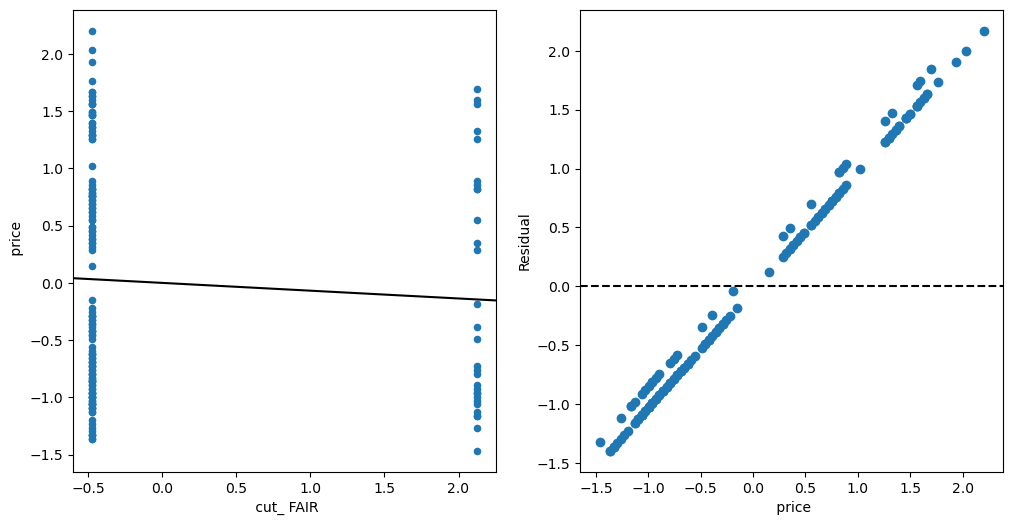

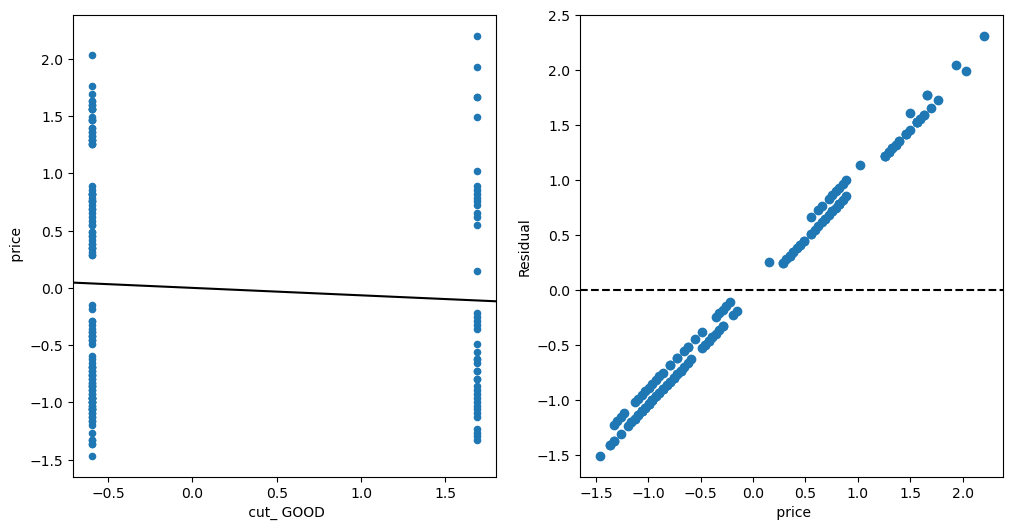

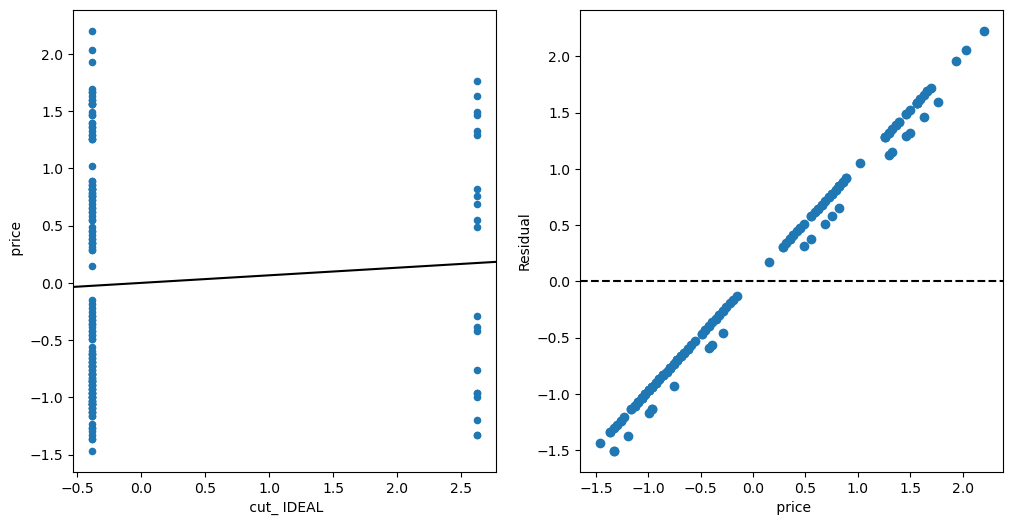

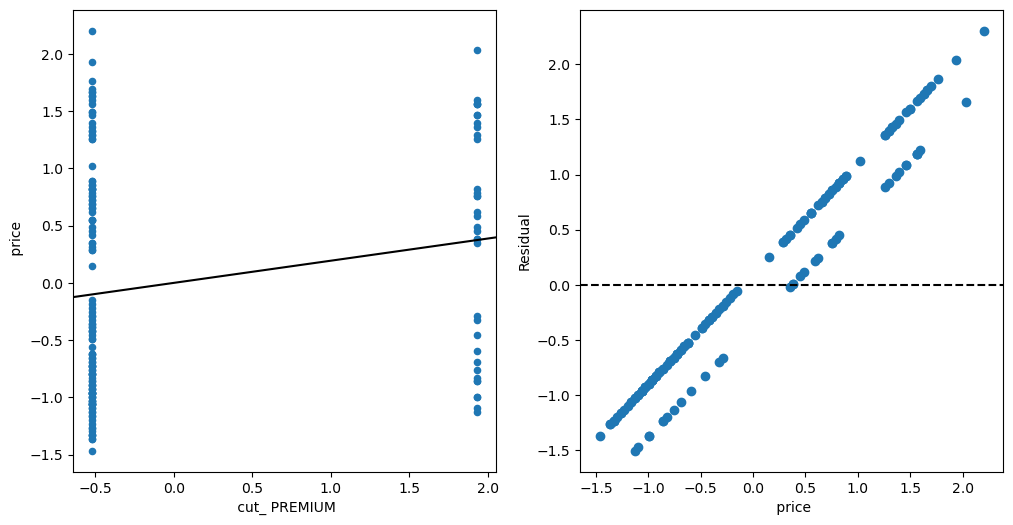

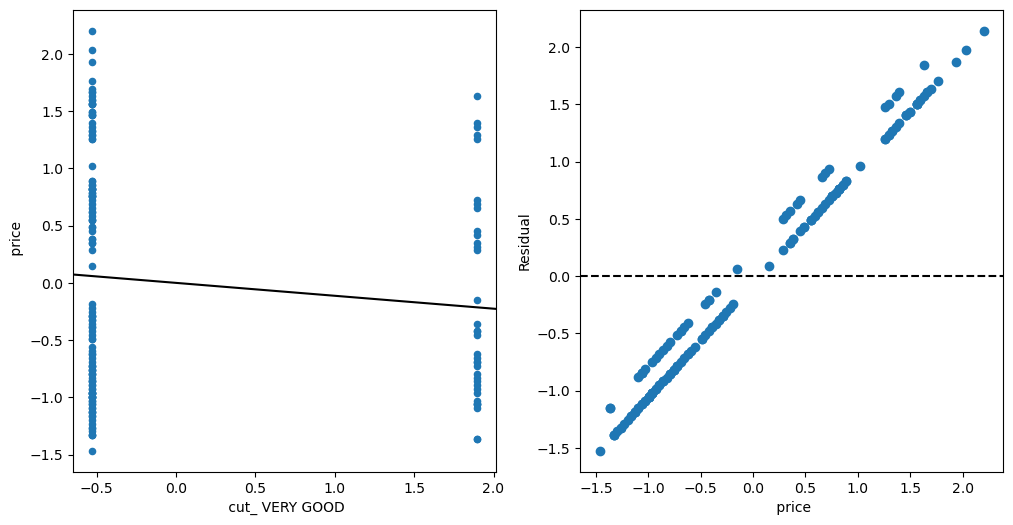

In [23]:
import statsmodels.api as sm

y = one_hot_encoded[' price']

#df['x dimension'] = df['x dimension'].astype(float)
'''for i in cols_list:
    print(i)
    x = df['carat']
    X = sm.add_constant(x)
    lm = sm.OLS(y, X)
    lm_fit = lm.fit()
    #print(lm_fit.summary())
    print(i)'''
    
def lrfit(y,X,i):
    lm = sm.OLS(y, X)
    lm_fit = lm.fit()
    print(lm_fit.summary())
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    one_hot_encoded.plot(kind='scatter', y=' price', x=f'{i}', ax=ax1)
    (b0, b1) = lm_fit.params

    ax1.axline(xy1=(0,b0), slope=b1, color='k')

    ax2.scatter(one_hot_encoded[' price'], lm_fit.resid)
    ax2.axhline(0, linestyle='--', color='k')
    ax2.set_xlabel(' price')
    ax2.set_ylabel('Residual')
    
cols_list = one_hot_encoded.columns.tolist()
for i in cols_list:
    if one_hot_encoded[f'{i}'].dtype == 'float64' or one_hot_encoded[f'{i}'].dtype == 'int':
        lrfit(one_hot_encoded[' price'], sm.add_constant(one_hot_encoded[f'{i}']),i)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     511.1
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           4.07e-52
Time:                        10:57:09   Log-Likelihood:                -117.01
No. Observations:                 165   AIC:                             238.0
Df Residuals:                     163   BIC:                             244.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.327e-17      0.039  -2.16e-15      1.0

C:\Users\Paweł\AppData\Local\Temp\ipykernel_23156\3979649287.py:19: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7590
Date:                Sun, 04 Feb 2024   Prob (F-statistic):              0.385
Time:                        10:57:13   Log-Likelihood:                -233.74
No. Observations:                 165   AIC:                             471.5
Df Residuals:                     163   BIC:                             477.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.327e-17      0.078  -1.07e-15      1.0

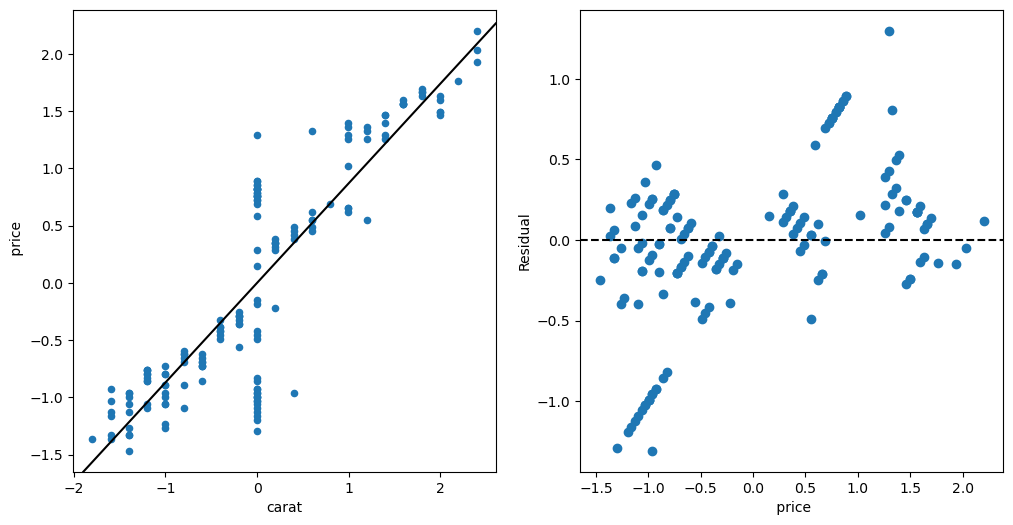

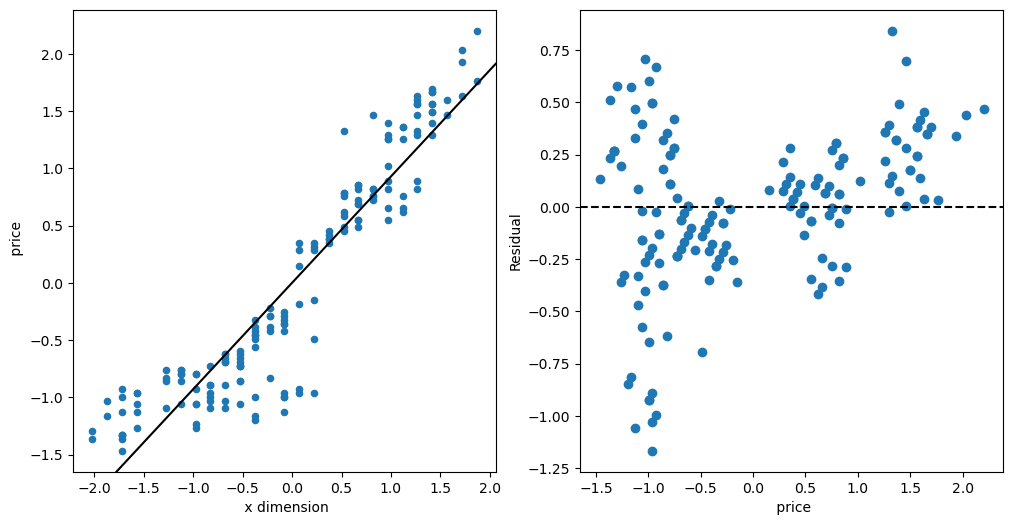

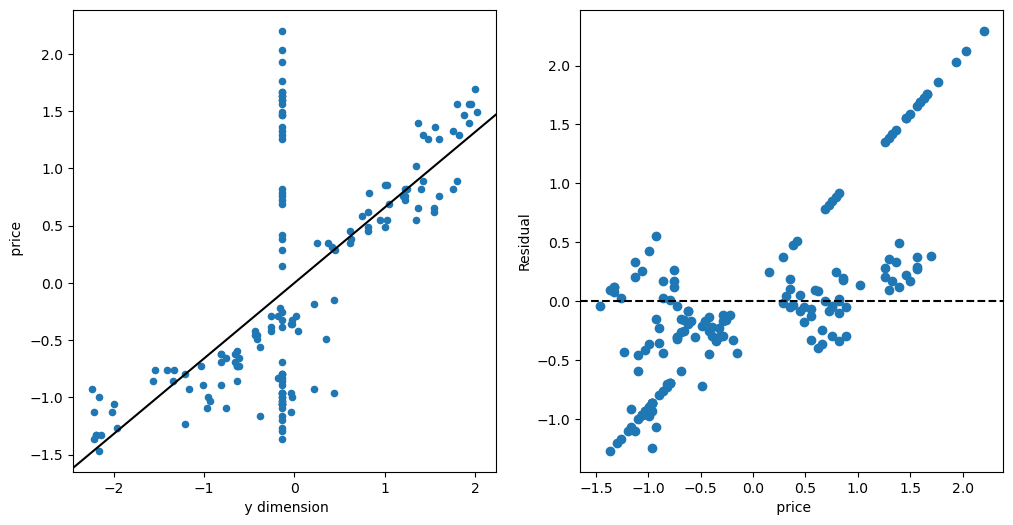

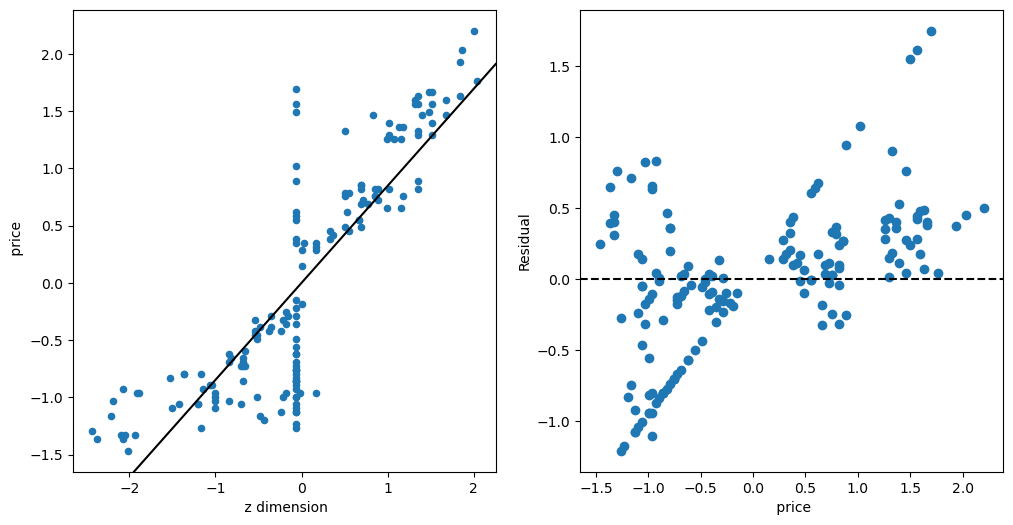

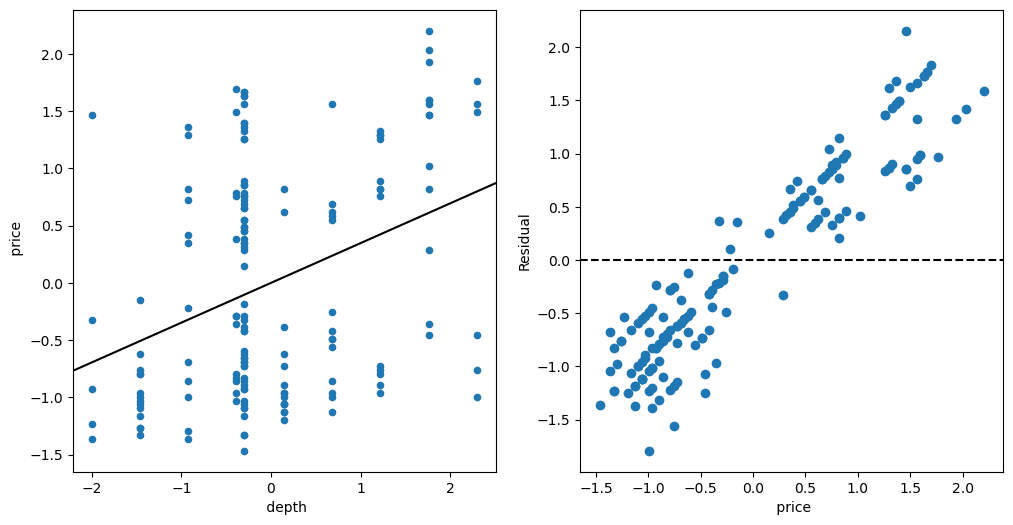

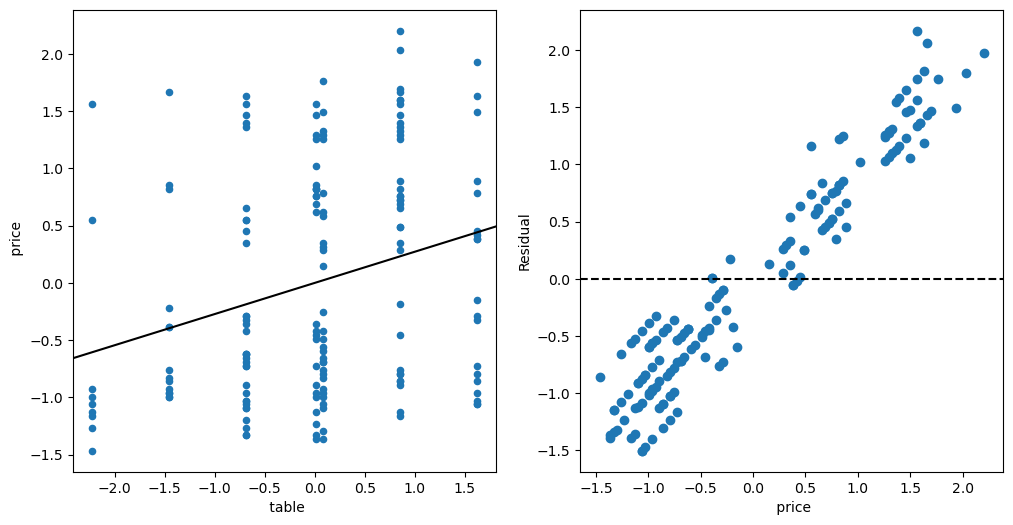

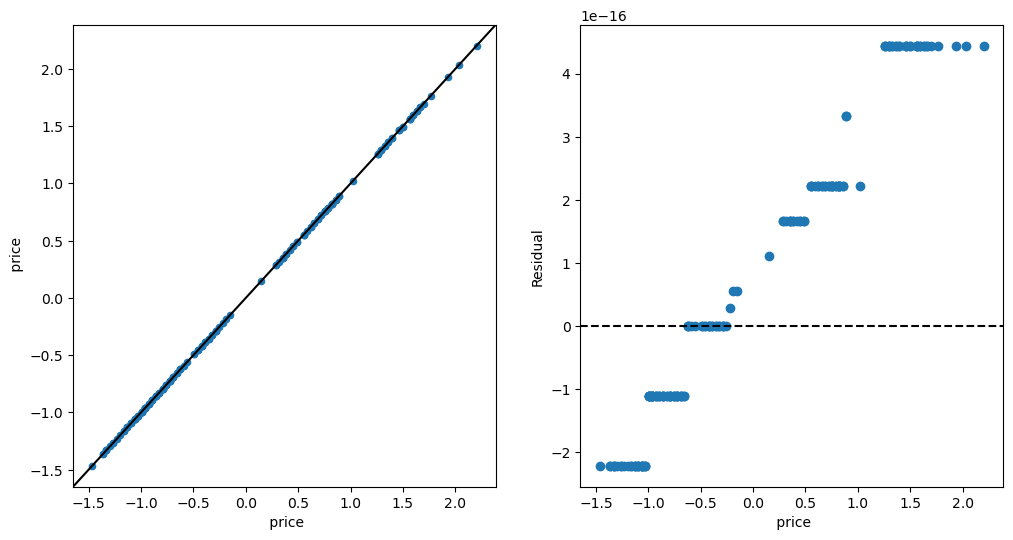

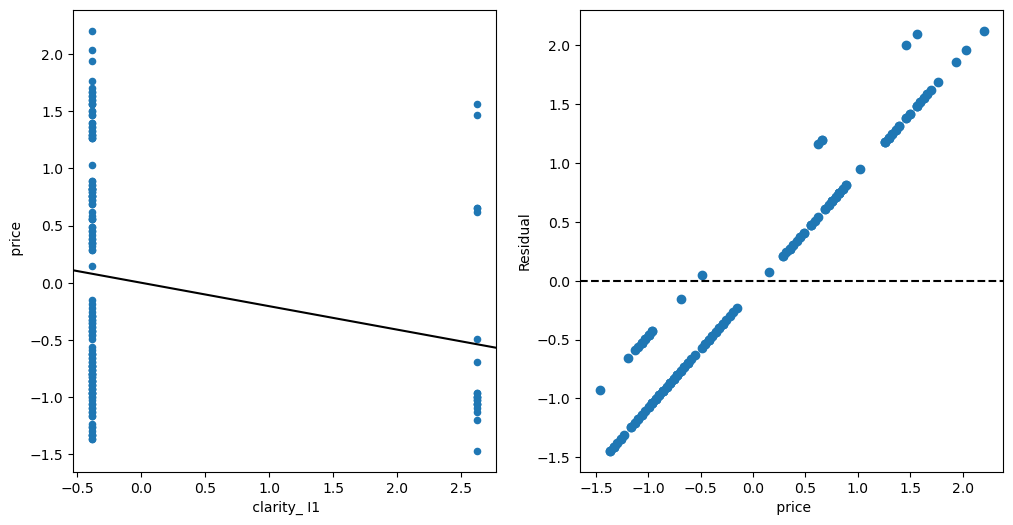

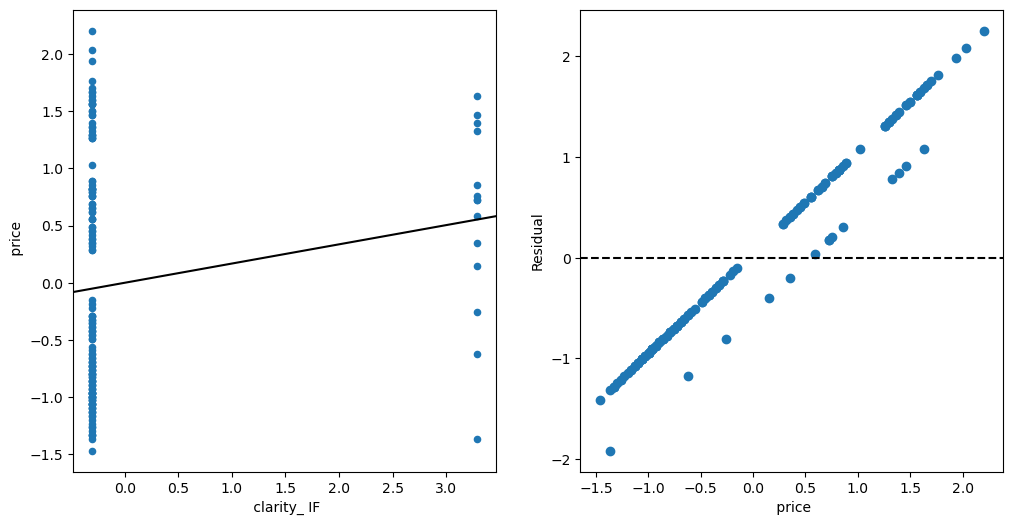

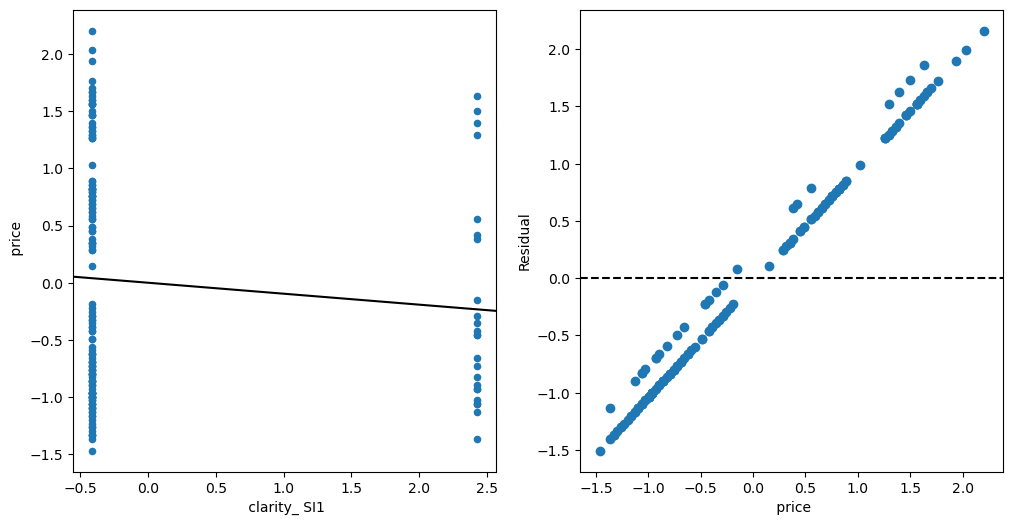

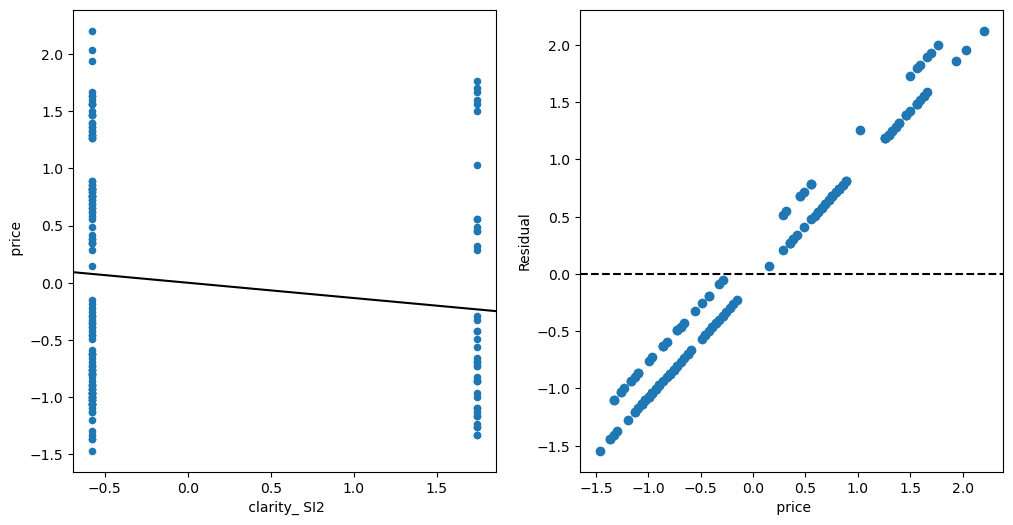

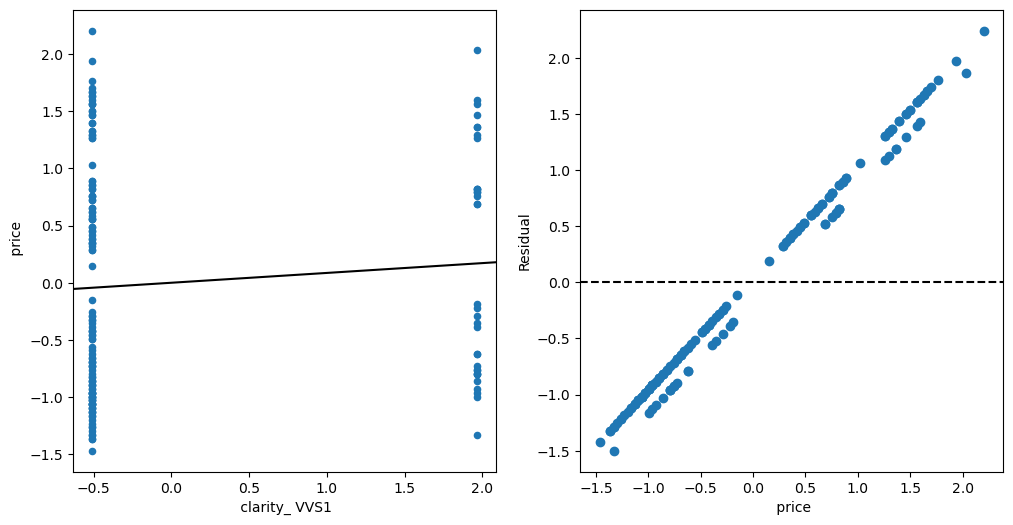

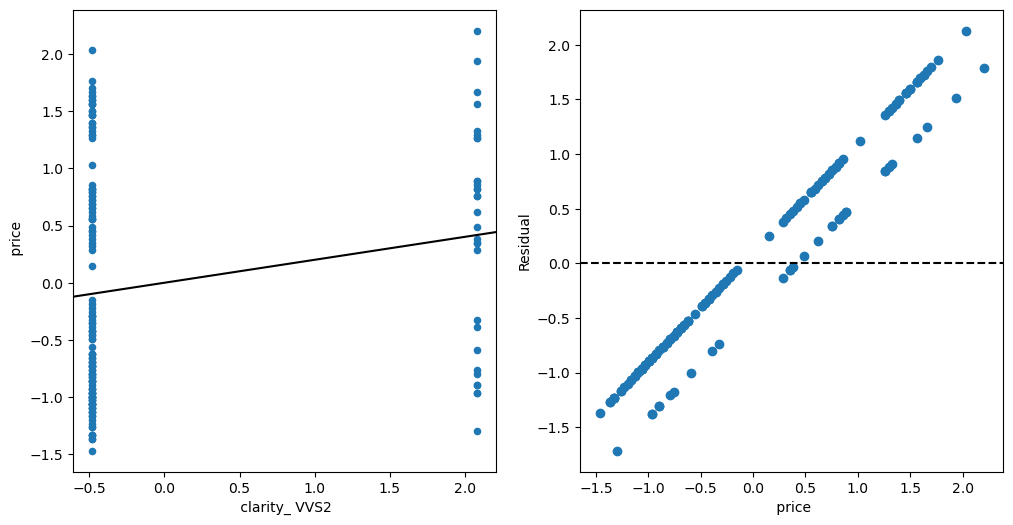

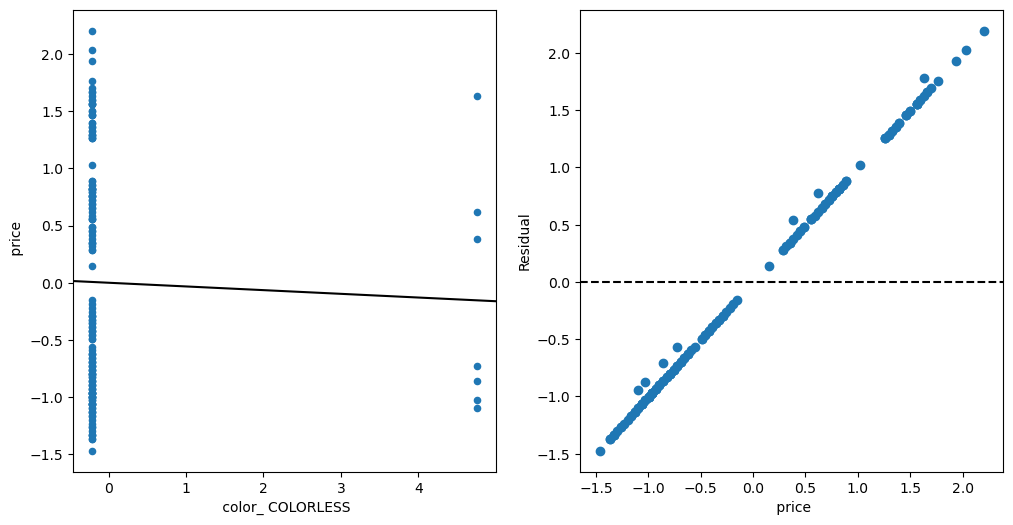

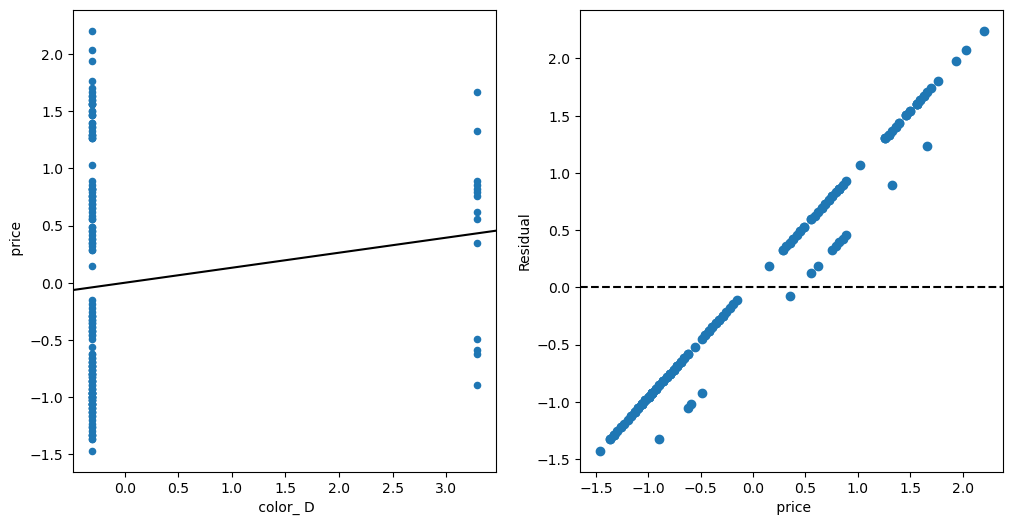

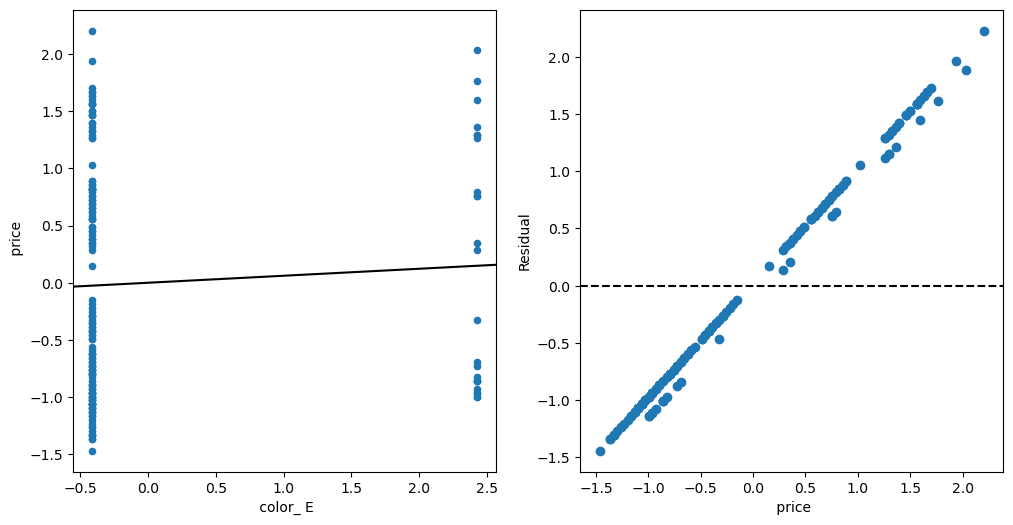

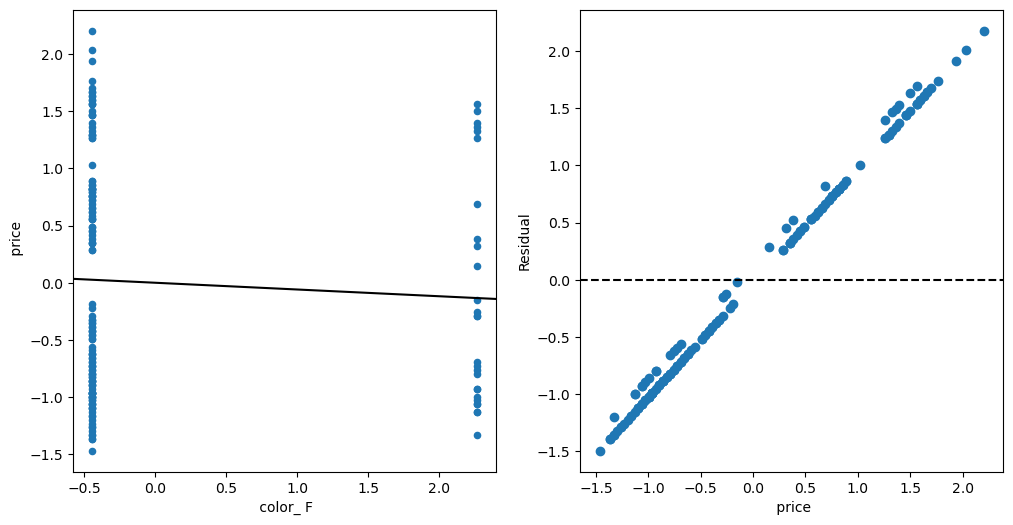

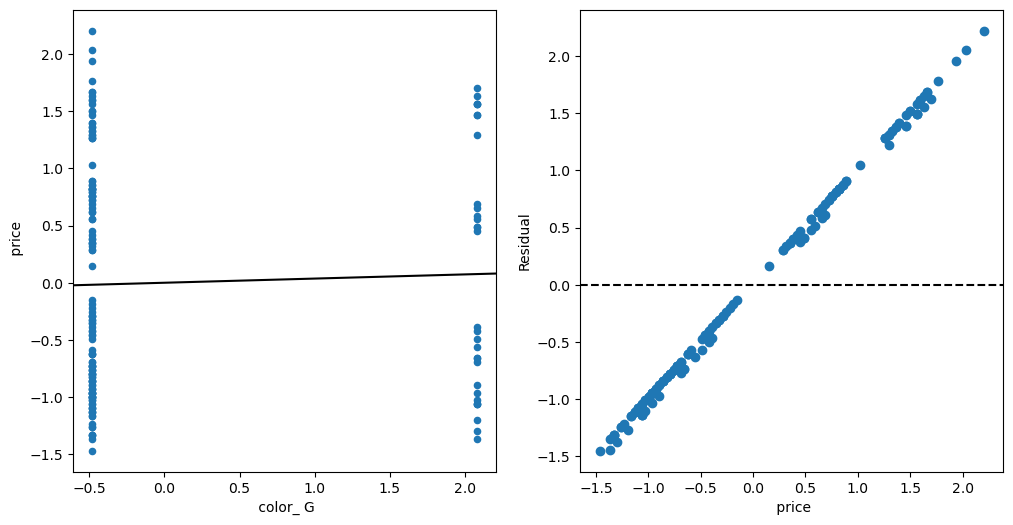

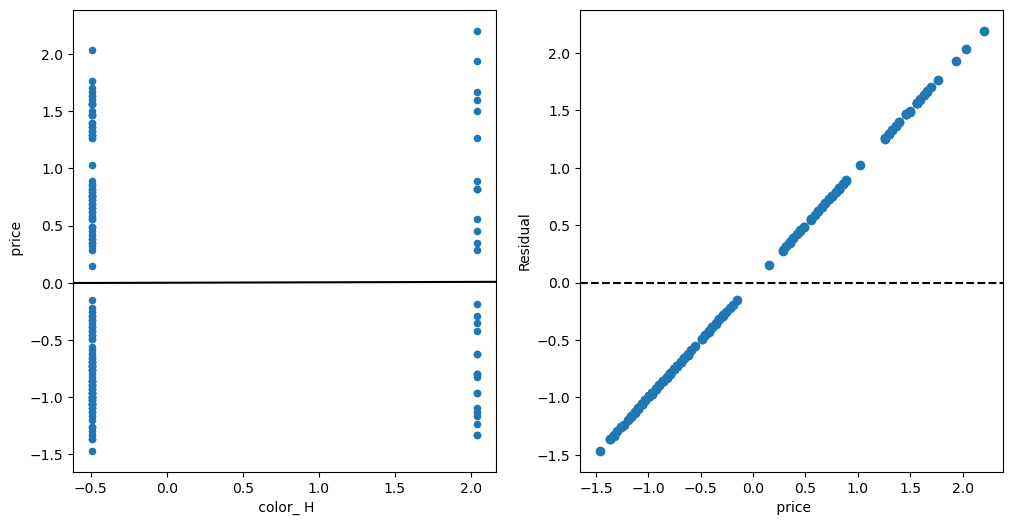

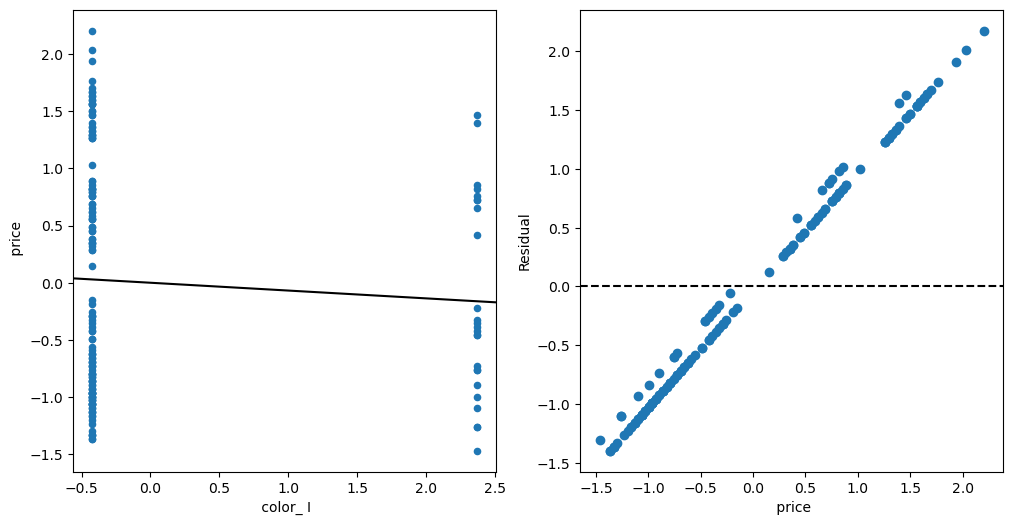

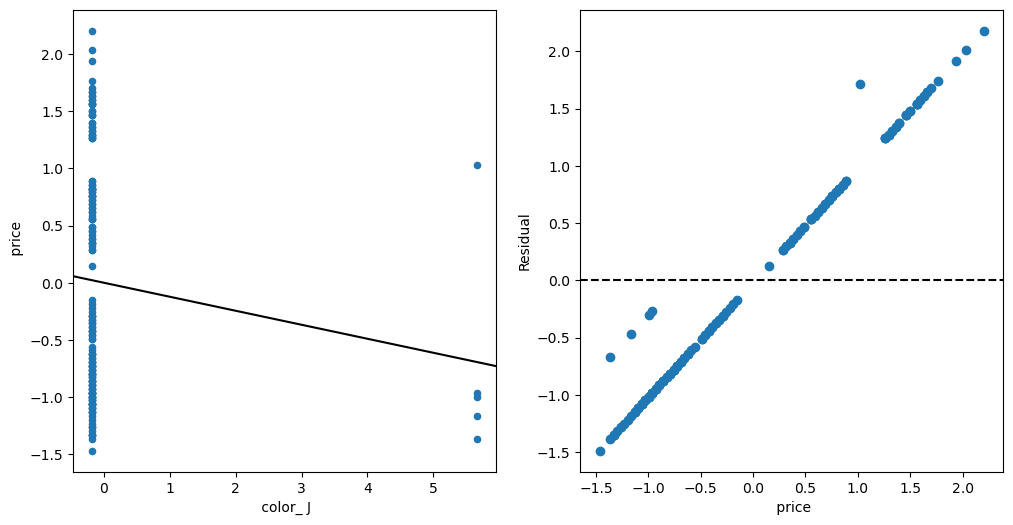

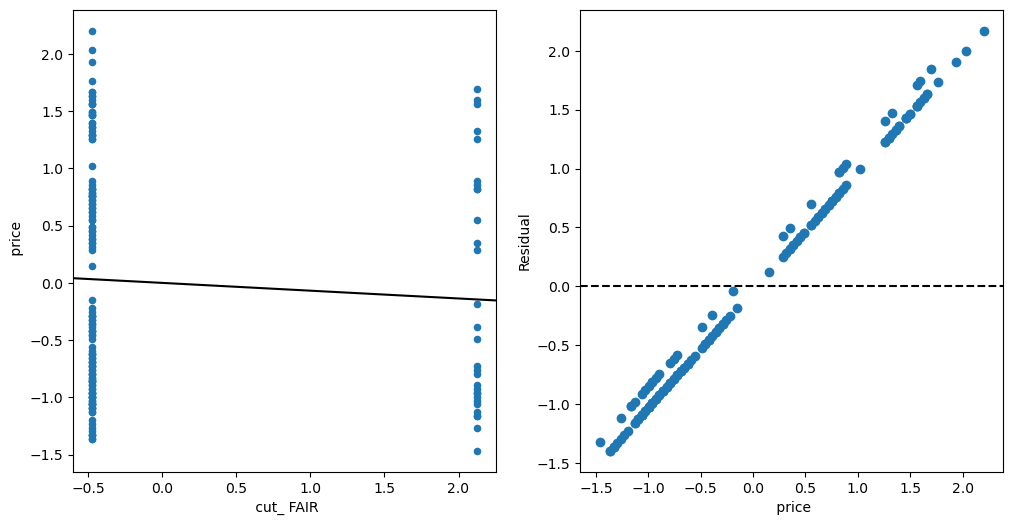

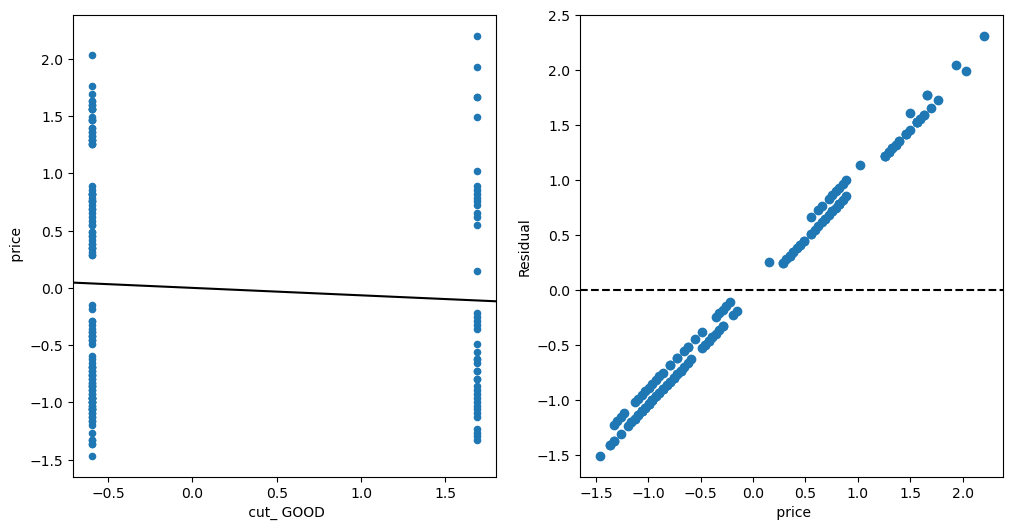

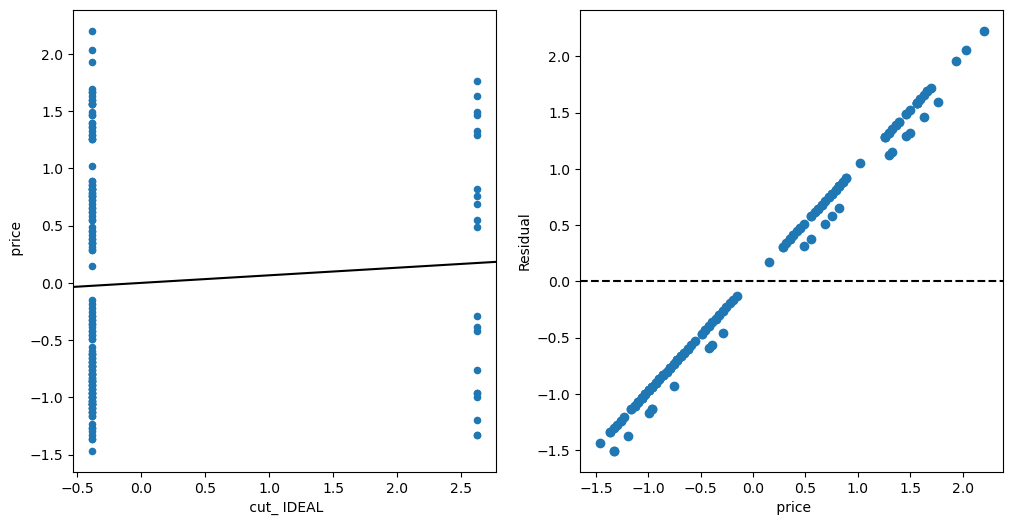

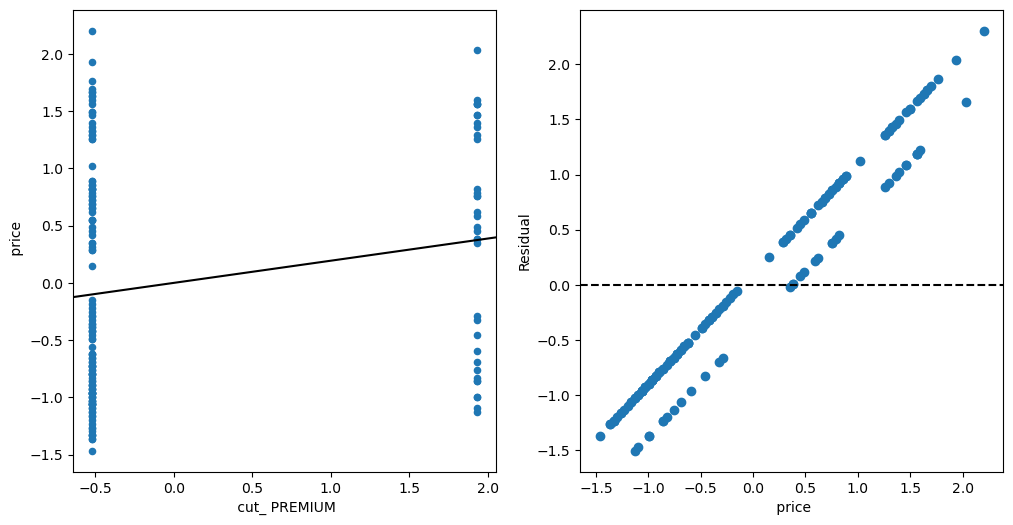

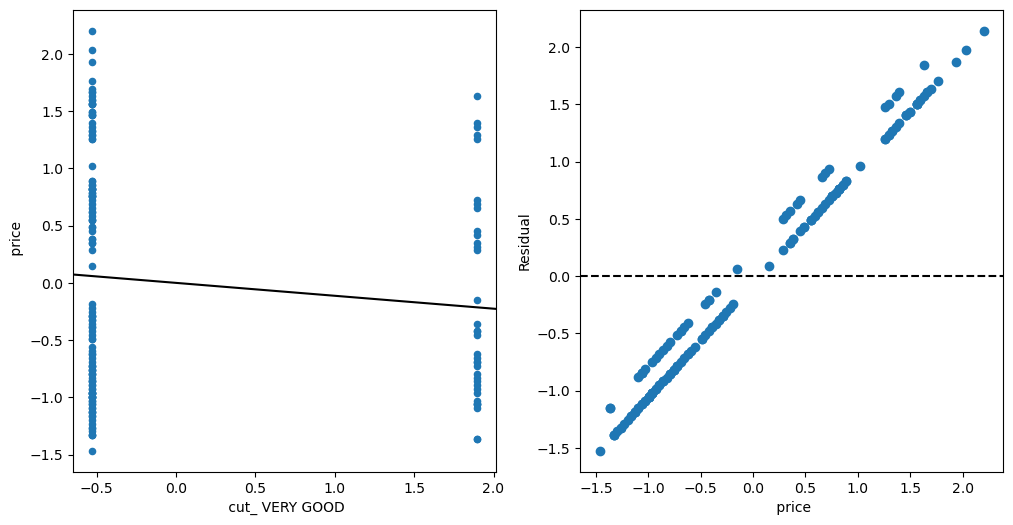

In [24]:
import statsmodels.api as sm

y = one_hot_encoded[' price']

#df['x dimension'] = df['x dimension'].astype(float)
'''for i in cols_list:
    print(i)
    x = df['carat']
    X = sm.add_constant(x)
    lm = sm.OLS(y, X)
    lm_fit = lm.fit()
    #print(lm_fit.summary())
    print(i)'''
    
def lrfit(y,X,i):
    lm = sm.OLS(y, X)
    lm_fit = lm.fit()
    print(lm_fit.summary())
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    one_hot_encoded.plot(kind='scatter', y=' price', x=f'{i}', ax=ax1)
    (b0, b1) = lm_fit.params

    ax1.axline(xy1=(0,b0), slope=b1, color='k')

    ax2.scatter(one_hot_encoded[' price'], lm_fit.resid)
    ax2.axhline(0, linestyle='--', color='k')
    ax2.set_xlabel(' price')
    ax2.set_ylabel('Residual')
    
cols_list = one_hot_encoded.columns.tolist()
for i in cols_list:
    if one_hot_encoded[f'{i}'].dtype == 'float64' or one_hot_encoded[f'{i}'].dtype == 'int':
        lrfit(one_hot_encoded[' price'], sm.add_constant(one_hot_encoded[f'{i}']),i)